## Importing Libraries

In [76]:
from collections import Counter, defaultdict
from wordcloud import WordCloud, STOPWORDS

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import re
import plotly.graph_objs as go
from plotly import tools
from plotly.graph_objs import Scatter, Figure, Layout

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


import nltk #NLP tasks


#plotting libraries!
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point

%matplotlib inline

from datetime import datetime

import warnings 
warnings.filterwarnings('ignore')

## Exploratory Data Analysis

### Looking at first few rows of data

In [77]:
data = pd.read_csv("/Users/chaitanyakota/Desktop/Stockwits_RA/For_EDA/TSLA.csv")
data.sort_values(by=['message_id'],ascending = False,inplace=True)
data.head(10)

,created_at,user_name,user_id,bear_bull_tag,text,message_id
449971,2022-09-09T21:33:25Z,RocketRockett,6153143,Bullish,$TSLA $340 Monday!,484057118
449972,2022-09-09T21:32:34Z,Billionaireclubcollc,1505519,NaN,"5 things to know for Sept. 9: The Queen, Weath...",484056998
449973,2022-09-09T21:32:08Z,harrypoker,6690898,Bullish,"$TSLA next stop, 400.",484056936
449974,2022-09-09T21:31:59Z,BluefaceInvestor,3337684,Bearish,"$TSLA if you don’t know, low volume price incr...",484056916
449975,2022-09-09T21:31:21Z,mariyakims,6826985,Bullish,"$SPY $MULN $AMC $AVCT $TSLA \n \n$49,700 on ...",484056825
449976,2022-09-09T21:30:15Z,Punisher_Always_Wins,6383365,Bearish,$tsla,484056667
449977,2022-09-09T21:30:14Z,SteveTroy,3189220,Bullish,$TSLA $350 by Tuesday? Elon Musk eyeing anothe...,484056665
449978,2022-09-09T21:29:53Z,Billionaireclubcollc,1505519,NaN,"DocuSign, Tesla, RH and more https://www.billi...",484056605
449979,2022-09-09T21:26:41Z,IRNTdude,6848683,NaN,$TSLA just out. https://qz.com/an-obscure-un-a...,484056115
449980,2022-09-09T21:23:02Z,KingofAnalysts,744693,Bullish,$TSLA Price target for Next week? Is $330 poss...,484055550


### Dataset size

In [78]:
print(f"No of rows: {data.shape[0]} \nNo of columns: {data.shape[1]}")

No of rows: 3212395 
No of columns: 6


### Dataset info

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3212395 entries, 449971 to 3212394
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   created_at     object
 1   user_name      object
 2   user_id        int64 
 3   bear_bull_tag  object
 4   text           object
 5   message_id     int64 
dtypes: int64(2), object(4)
memory usage: 171.6+ MB


## Checking for NUll Values

In [80]:
data.isnull().any()

created_at       False
user_name        False
user_id          False
bear_bull_tag     True
text              True
message_id       False
dtype: bool

In [81]:
data['text'].isna().sum()

7

In [82]:
data['bear_bull_tag'].isna().sum()

1481273

### Null values

In [83]:
def missing_values(data):
    total=data.isnull().sum().sort_values(ascending=False)
    percentage=round(total/ data.shape[0]*100,1)
    return pd.concat([total,percentage],axis=1,keys=['Quantity_Null','Percentage'])


missing_values(data)

,Quantity_Null,Percentage
bear_bull_tag,1481273,46.1
text,7,0.0
created_at,0,0.0
user_name,0,0.0
user_id,0,0.0
message_id,0,0.0


### The tweets without any bear/bulll tag are NA. Hence, many Null Values. These NA are imputed with "No Tag".  The few missing tweets are deleted from the corpus

### Imputing/Dropping Null

In [84]:
data[['bear_bull_tag']] = data[['bear_bull_tag']].fillna('No Tag')
data = data.dropna()

In [85]:
data.head(10)

,created_at,user_name,user_id,bear_bull_tag,text,message_id
449971,2022-09-09T21:33:25Z,RocketRockett,6153143,Bullish,$TSLA $340 Monday!,484057118
449972,2022-09-09T21:32:34Z,Billionaireclubcollc,1505519,No Tag,"5 things to know for Sept. 9: The Queen, Weath...",484056998
449973,2022-09-09T21:32:08Z,harrypoker,6690898,Bullish,"$TSLA next stop, 400.",484056936
449974,2022-09-09T21:31:59Z,BluefaceInvestor,3337684,Bearish,"$TSLA if you don’t know, low volume price incr...",484056916
449975,2022-09-09T21:31:21Z,mariyakims,6826985,Bullish,"$SPY $MULN $AMC $AVCT $TSLA \n \n$49,700 on ...",484056825
449976,2022-09-09T21:30:15Z,Punisher_Always_Wins,6383365,Bearish,$tsla,484056667
449977,2022-09-09T21:30:14Z,SteveTroy,3189220,Bullish,$TSLA $350 by Tuesday? Elon Musk eyeing anothe...,484056665
449978,2022-09-09T21:29:53Z,Billionaireclubcollc,1505519,No Tag,"DocuSign, Tesla, RH and more https://www.billi...",484056605
449979,2022-09-09T21:26:41Z,IRNTdude,6848683,No Tag,$TSLA just out. https://qz.com/an-obscure-un-a...,484056115
449980,2022-09-09T21:23:02Z,KingofAnalysts,744693,Bullish,$TSLA Price target for Next week? Is $330 poss...,484055550


In [86]:
data['text'].isna().sum()
data['bear_bull_tag'].isna().sum()
missing_values(data)

,Quantity_Null,Percentage
created_at,0,0.0
user_name,0,0.0
user_id,0,0.0
bear_bull_tag,0,0.0
text,0,0.0
message_id,0,0.0


## Basic Plots

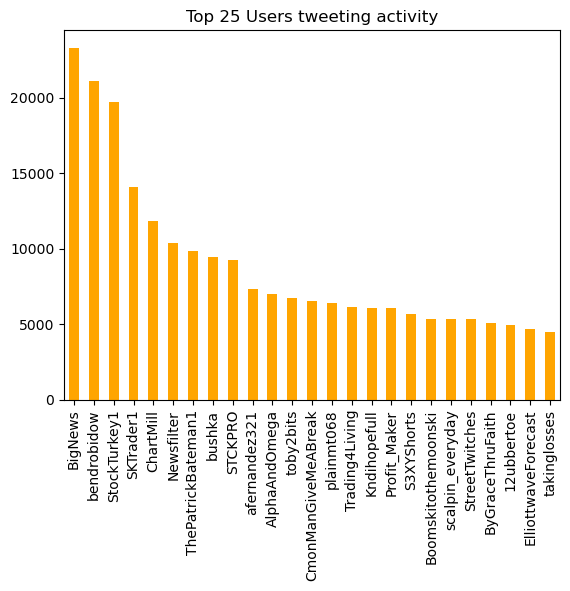

In [87]:
user = data['user_name'].value_counts()[:25]
user.plot(kind='bar', color='orange', title = "Top 25 Users tweeting activity");

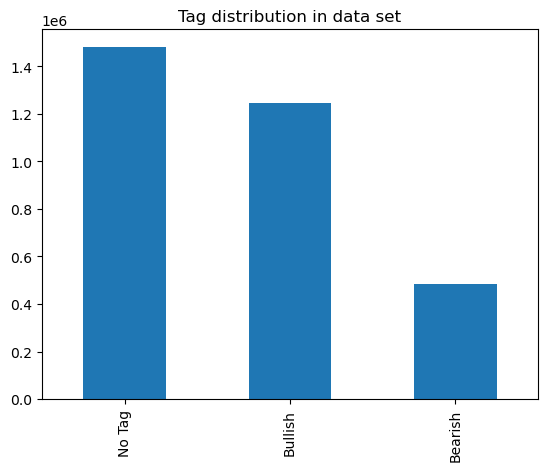

In [88]:
x = data.bear_bull_tag.value_counts()
x.plot(kind='bar',title = "Tag distribution in data set");

### Good majority of tweets in the corpus doesn't have a tag

## Data preperation

### Created new features for time( Date, Day, Month, Hour, Weekday, Len_of_tweet, No_Words_tweet)

In [89]:
data['created_at'] = data['created_at'].apply(lambda x: x[:10] + ' ' + x[11:-1])
data['date_time'] = data['created_at'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
data['date'] = data['date_time'].apply(lambda x: x.date())
data['day'] = data['date_time'].dt.day
data['month']=data['date_time'].dt.month
data['hour'] = data['date_time'].dt.hour
data['weekday']=data['date_time'].dt.strftime('%A')
data['text'] = data['text'].apply(lambda x: x.lower())

data['Len_of_tweet'] = data['text'].apply(lambda x: len(x))
data['No_of_words_tweet'] = data['text'].apply(lambda x: len(x.split()))

data.head()



,created_at,user_name,user_id,bear_bull_tag,text,message_id,date_time,date,day,month,hour,weekday,Len_of_tweet,No_of_words_tweet
449971,2022-09-09 21:33:25,RocketRockett,6153143,Bullish,$tsla $340 monday!,484057118,2022-09-09 21:33:25,2022-09-09,9,9,21,Friday,18,3
449972,2022-09-09 21:32:34,Billionaireclubcollc,1505519,No Tag,"5 things to know for sept. 9: the queen, weath...",484056998,2022-09-09 21:32:34,2022-09-09,9,9,21,Friday,227,19
449973,2022-09-09 21:32:08,harrypoker,6690898,Bullish,"$tsla next stop, 400.",484056936,2022-09-09 21:32:08,2022-09-09,9,9,21,Friday,21,4
449974,2022-09-09 21:31:59,BluefaceInvestor,3337684,Bearish,"$tsla if you don’t know, low volume price incr...",484056916,2022-09-09 21:31:59,2022-09-09,9,9,21,Friday,61,11
449975,2022-09-09 21:31:21,mariyakims,6826985,Bullish,"$spy $muln $amc $avct $tsla \n \n$49,700 on ...",484056825,2022-09-09 21:31:21,2022-09-09,9,9,21,Friday,109,14


In [90]:
print(f"No of rows: {data.shape[0]} \nNo of columns: {data.shape[1]}")

No of rows: 3212388 
No of columns: 14


## Spam Tweets/ Duplicate tweets

In [91]:
data_duplicates = data[data.duplicated(subset=['text'])]
data_duplicates.sort_values(by='text',ascending=True,inplace=True)
pd.set_option('display.width',1000)
#data.style.set_properties(subset=['text'], **{'width': '300px'})
data_duplicates[['user_name','date_time','text']].tail(50)

,user_name,date_time,text
2111038,The10xInvestmentsFellow,2020-06-30 18:04:04,😂 \n \n$aapl $tsla $amzn $spy $fb
2441072,FalseJoosrunitall,2020-02-03 18:03:04,😂 $tsla
2524396,SJosephBurns,2019-12-30 20:17:22,😂 $tsla
413793,NotNoob,2020-09-02 03:40:36,😂 10 years from now when $tsla is worth trilli...
2101984,The10xInvestmentsFellow,2020-07-04 22:21:56,😂 🤣 😅 \n \n$aapl $tsla $amzn $spy $fb
2085133,The10xInvestmentsFellow,2020-07-09 13:29:12,😂 🤣 😅 \n \n$aapl $tsla $amzn $spy $fb
2102267,The10xInvestmentsFellow,2020-07-04 06:23:25,😂 🤣 😅 \n \n$aapl $tsla $amzn $spy $fb
2079714,The10xInvestmentsFellow,2020-07-10 19:18:27,😂 🤣 😅 \n \n$aapl $tsla $amzn $spy $fb
2026298,The10xInvestmentsFellow,2020-07-23 18:15:46,😂🤣😅 \n \n$aapl $tsla $amzn $spy $fb
2050066,The10xInvestmentsFellow,2020-07-19 07:30:05,😂🤣😅 \n \n$aapl $tsla $amzn $spy $fb


In [92]:
print(f"No of rows: {data_duplicates.shape[0]} \nNo of columns: {data_duplicates.shape[1]}")

No of rows: 263077 
No of columns: 14


### Duplicate tweet patterns observed are: 

1) Combining trending tags or random tags like: ";) $aapl $tsla $spy $amd $amzn" along with spam messages, not relevant to ticker (Bot generated tweets for actvity)


2) Agencies ad's promoting their predictions 

Ex 1: "@sweepcast unusual options observed : $tsla with our scanner on $890 put expiring: 06-05-2022 worth 26küêª  all of these orders were sweeps meaning multiexchange orders that takes on all liqudity from the options markets to fill them ‚¨ÖÔ∏è still don&#39;t understand? @sweepcast - see profile for more info üèÜ" 

Ex2: "**my top watches for today!**
**large caps**
$nvda
$tsla
$hkd
$coin
$baba"

3) Tweets of just ticker symbol (Individual to multiple) like:

  a) $aapl $tsla $spy $amzn
  
  b) $aapl $tsla $spy
  
  c) $tsla $tsla
  
  d) $tsla ~75K TWEETS with just tsla (2% of corpus & 28% of duplicates)
 

We should remove out all tweets from category 3 from the corupus as they don't add any value.

Category 2, although they are spam they might be relevant.


 

### Preprocessing for EDA

In [93]:
data_no_dup_tweets_day = data.drop_duplicates(['date','text'])
data_no_dup_users_day = data.drop_duplicates(['date','user_name'])

unique_tweets_day = data_no_dup_tweets_day[['text', 'date']].groupby(['date']).count()
unique_tweets_day.sort_values(by='date',ascending=False,inplace=True)
unique_tweets_day.columns = ['tweet_count_per_day']

unique_users_day = data_no_dup_users_day[['user_name','date']].groupby(['date']).count()
unique_users_day.sort_values(by='date',ascending=False,inplace=True)
unique_users_day.columns = ['users_per_day']

unique_tweets_day.sort_index(ascending=False, inplace = True)
unique_tweets_day.reset_index(drop=False, inplace=True)
unique_users_day.sort_index(ascending=False, inplace = True)
unique_users_day.reset_index(drop=False, inplace=True)

### Unique tweets per day

In [94]:
unique_tweets_day.head(10)

,date,tweet_count_per_day
0,2022-09-09,1979
1,2022-09-08,1858
2,2022-09-07,1831
3,2022-09-06,1776
4,2022-09-05,380
5,2022-09-04,257
6,2022-09-03,289
7,2022-09-02,2044
8,2022-09-01,2267
9,2022-08-28,447


### Unique users per day

In [95]:
unique_users_day.head(10)

,date,users_per_day
0,2022-09-09,819
1,2022-09-08,735
2,2022-09-07,692
3,2022-09-06,676
4,2022-09-05,211
5,2022-09-04,153
6,2022-09-03,186
7,2022-09-02,778
8,2022-09-01,807
9,2022-08-28,262


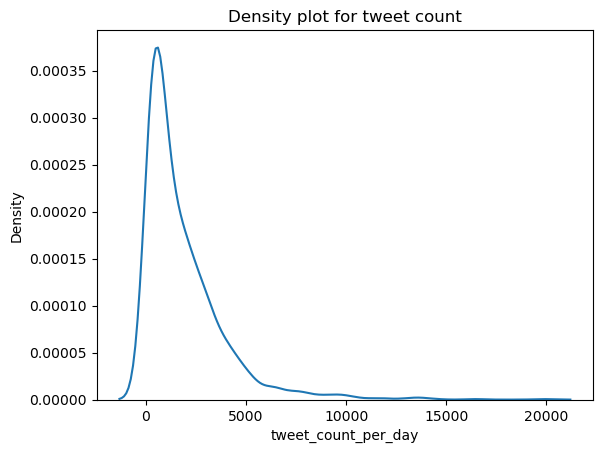

In [96]:
data1 = data[data.duplicated(subset=['text'])]

data1.to_csv('/Users/chaitanyakota/Desktop/TSLA_DUP.csv')

sns.kdeplot(unique_tweets_day['tweet_count_per_day']).set(title='Density plot for tweet count');

### The data is skewed due to less activity in stocktwits in some years compared to others

## Statistics of unique_tweets, len_of_tweet, no_of_words_tweet, unique_users

### Unique tweets

In [97]:
unique_tweets_day.describe().iloc[1:, :]

,tweet_count_per_day
mean,1840.513577
std,2024.193089
min,44.000000
25%,459.250000
50%,1176.000000
75%,2541.000000
max,19824.000000


### Len of tweet and No of words of tweet

In [98]:
data[['Len_of_tweet','No_of_words_tweet']].describe().iloc[1:, :]


,Len_of_tweet,No_of_words_tweet
mean,96.775577,16.160267
std,109.813222,18.244495
min,5.000000,1.000000
25%,34.000000,6.000000
50%,65.000000,11.000000
75%,121.000000,20.000000
max,3173.000000,295.000000


### Unique_users_day

In [99]:
unique_users_day.describe().iloc[1:, :]

,users_per_day
mean,733.149941
std,728.050237
min,31.000000
25%,241.000000
50%,487.000000
75%,1001.750000
max,5477.000000


## Plots

### Histogram for Unique tweets per day

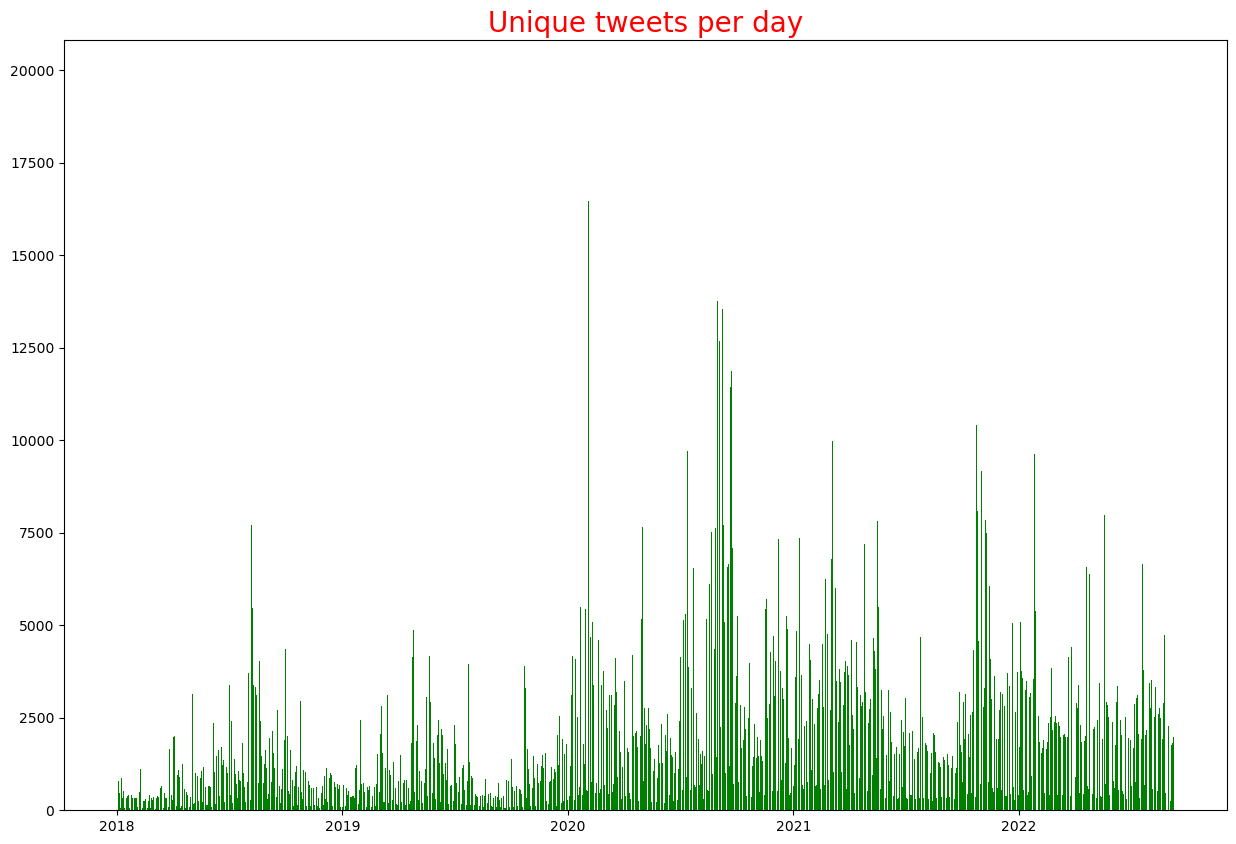

In [100]:
plt.figure(figsize = (15, 10))
plt.bar(unique_tweets_day['date'], unique_tweets_day['tweet_count_per_day'],color = 'green');
plt.title(label="Unique tweets per day",
          fontsize=20,
          color="Red");

### Histogram for unique users per day

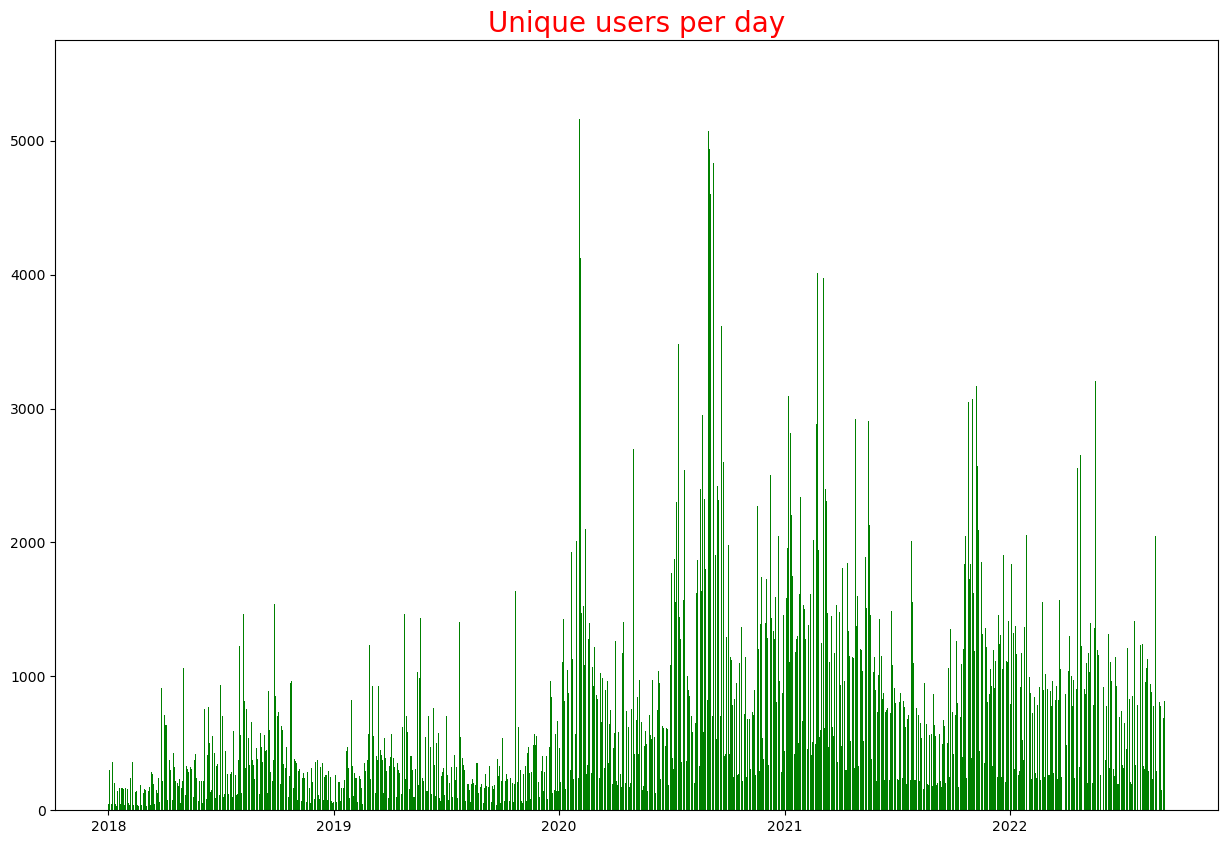

In [101]:
plt.figure(figsize = (15, 10))
plt.bar(unique_users_day['date'], unique_users_day['users_per_day'],color = 'green');
plt.title(label="Unique users per day",
          fontsize=20,
          color="Red");

## Data preprocessing for further EDA

In [102]:
data_weekday = data[['text', 'user_id','weekday']].groupby(['weekday']).count()
data_weekday.reset_index(drop=False, inplace=True)
data_hour = data[['text', 'user_id','hour']].groupby(['hour']).count()
data_hour.reset_index(drop=False, inplace=True)
data_month = data[['text', 'user_id','month']].groupby(['month']).count()
data_month.reset_index(drop=False, inplace=True)



### Histogram for no of tweets (By hour of day, By Day of week, By Month of year)

Text(0.5, 1.0, 'No of Tweets by month')

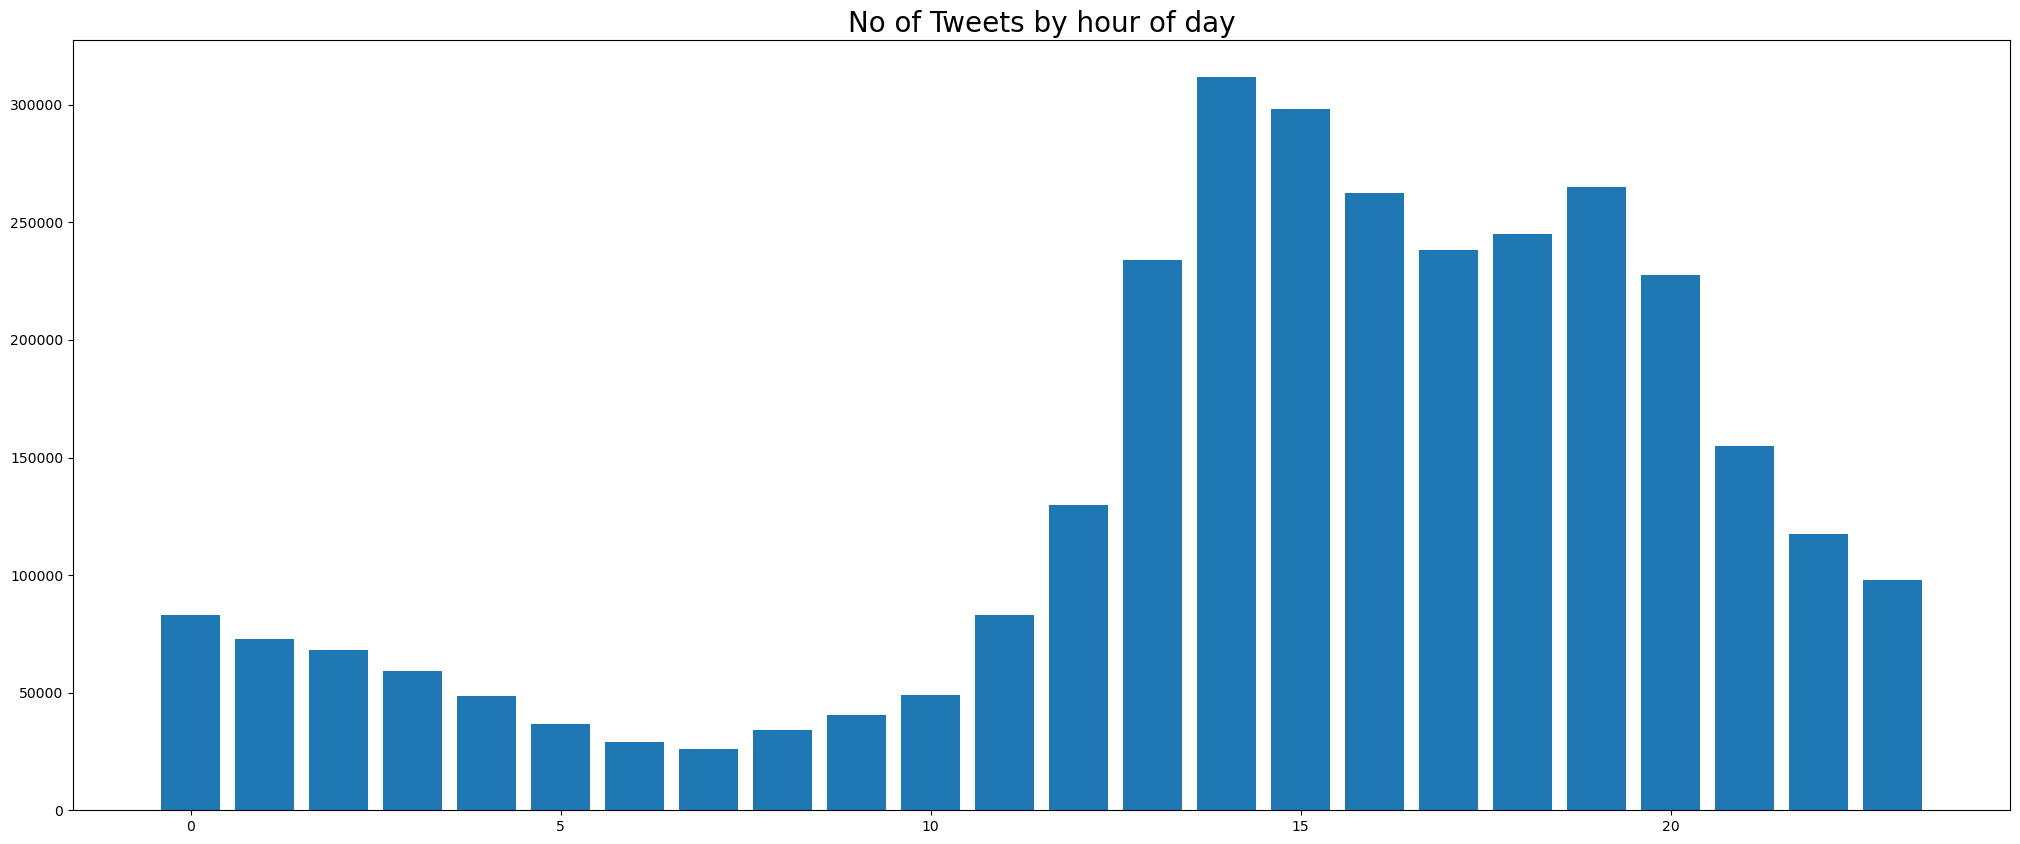

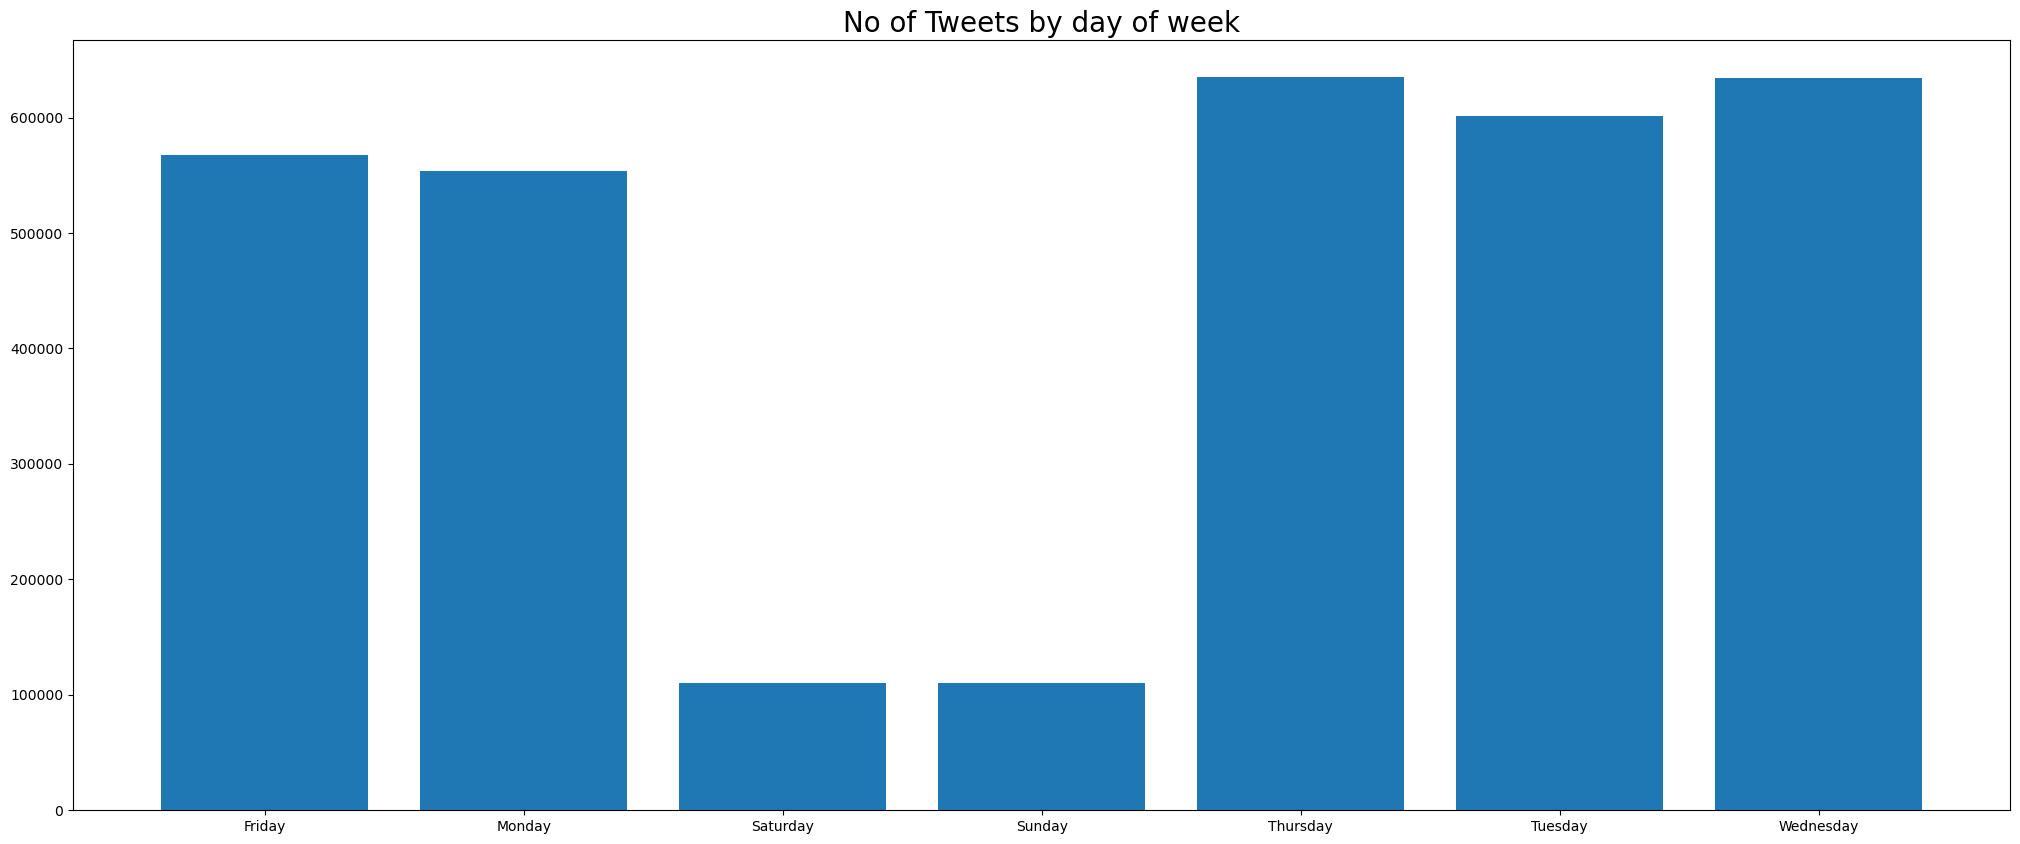

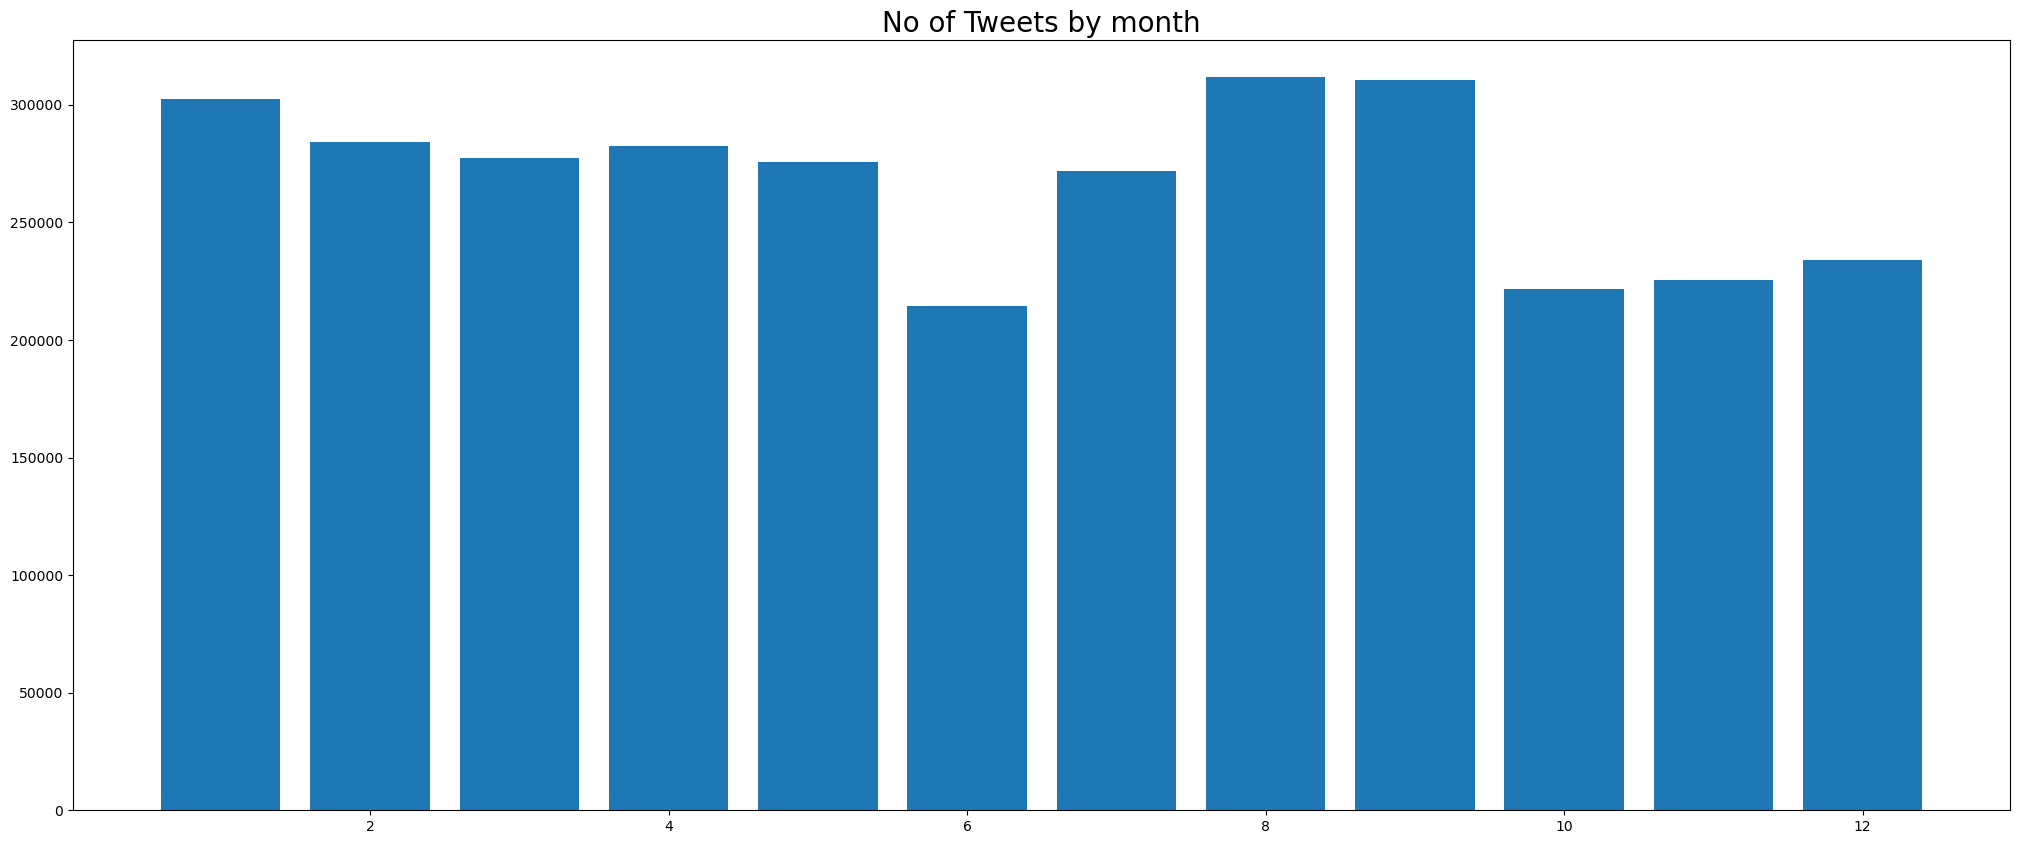

In [103]:
plt.figure(figsize = (25, 10))
plt.bar(data_hour['hour'], data_hour['text'])
plt.title("No of Tweets by hour of day",fontsize=20)

plt.figure(figsize = (25, 10))
plt.bar(data_weekday['weekday'], data_weekday['text'])
plt.title("No of Tweets by day of week",fontsize=20)

plt.figure(figsize = (25, 10))
plt.bar(data_month['month'], data_month['text'])
plt.title("No of Tweets by month",fontsize=20)

### Histogram for no of users (By hour of day, By Day of week, By Month of year)

Text(0.5, 1.0, 'No of Users by month')

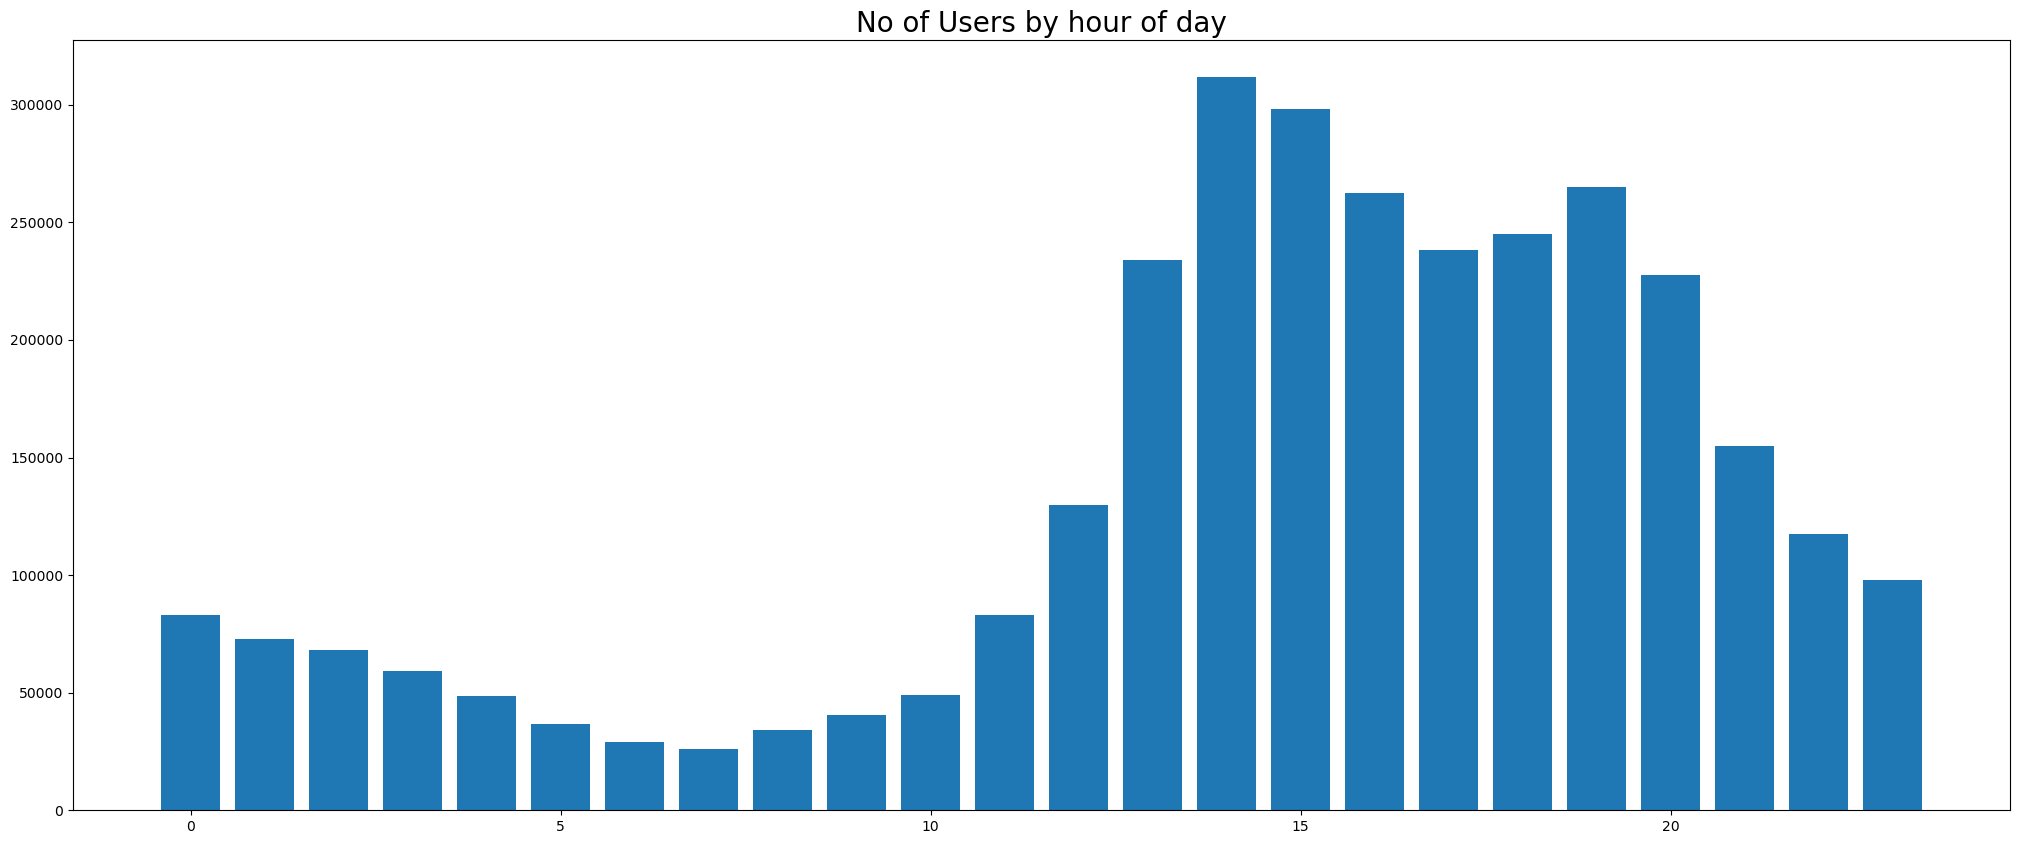

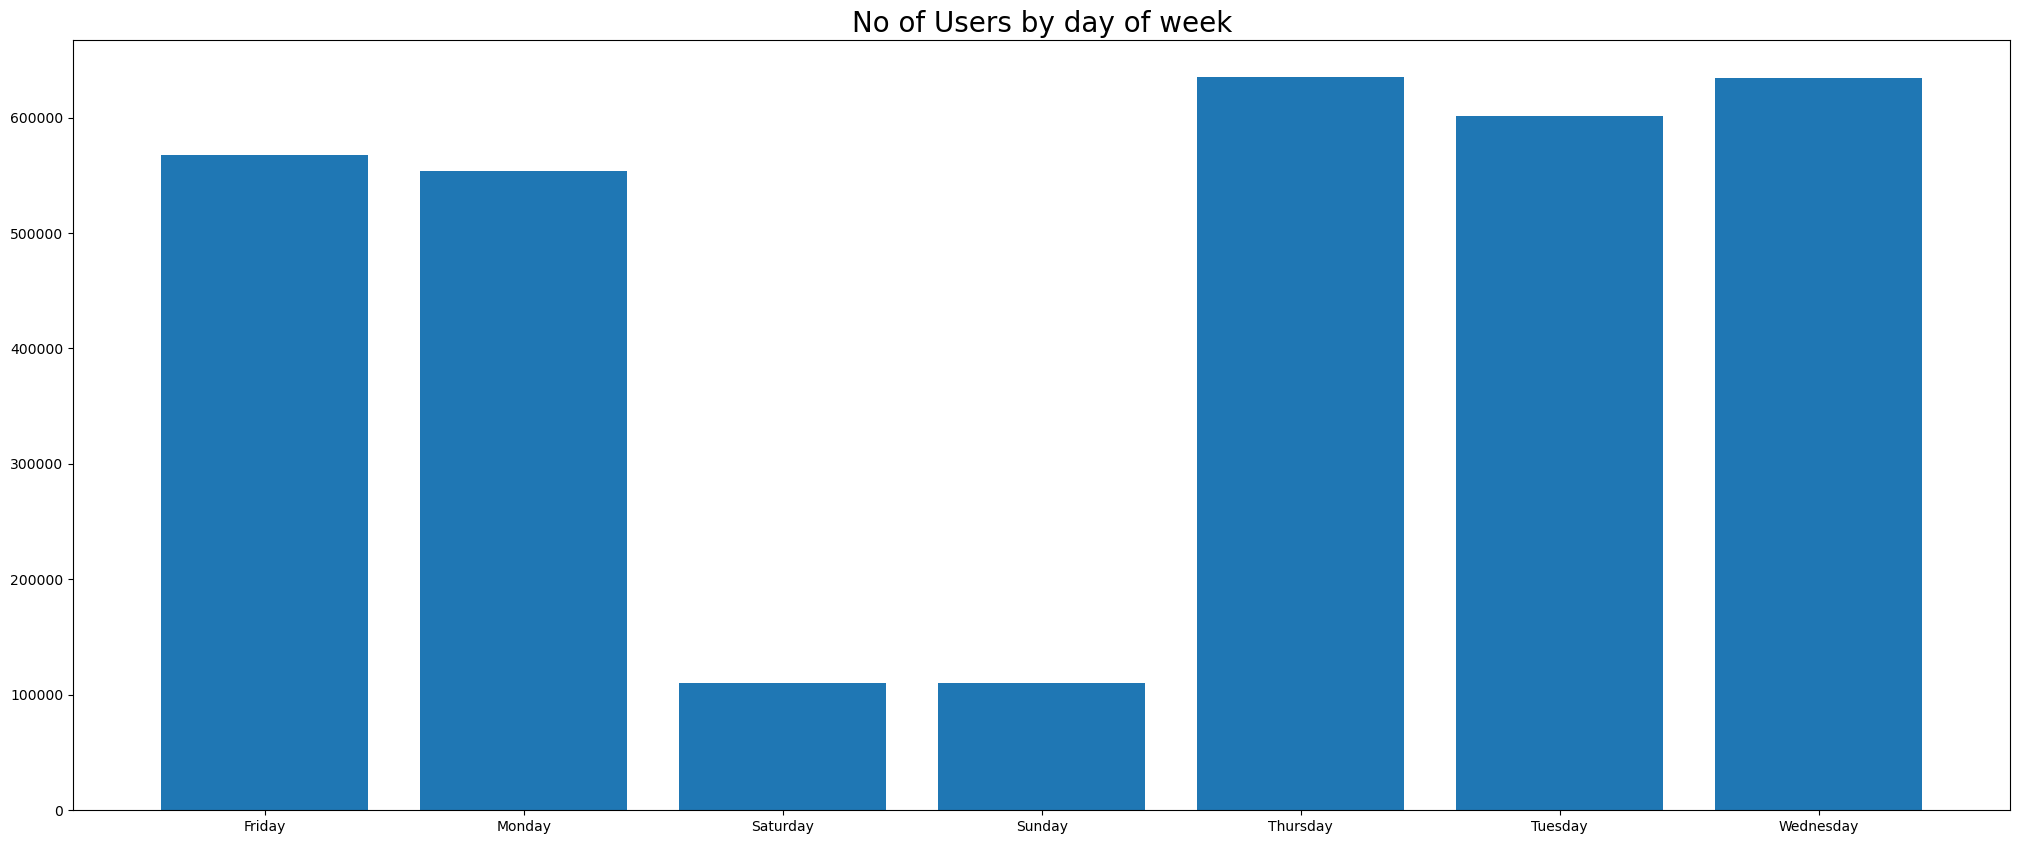

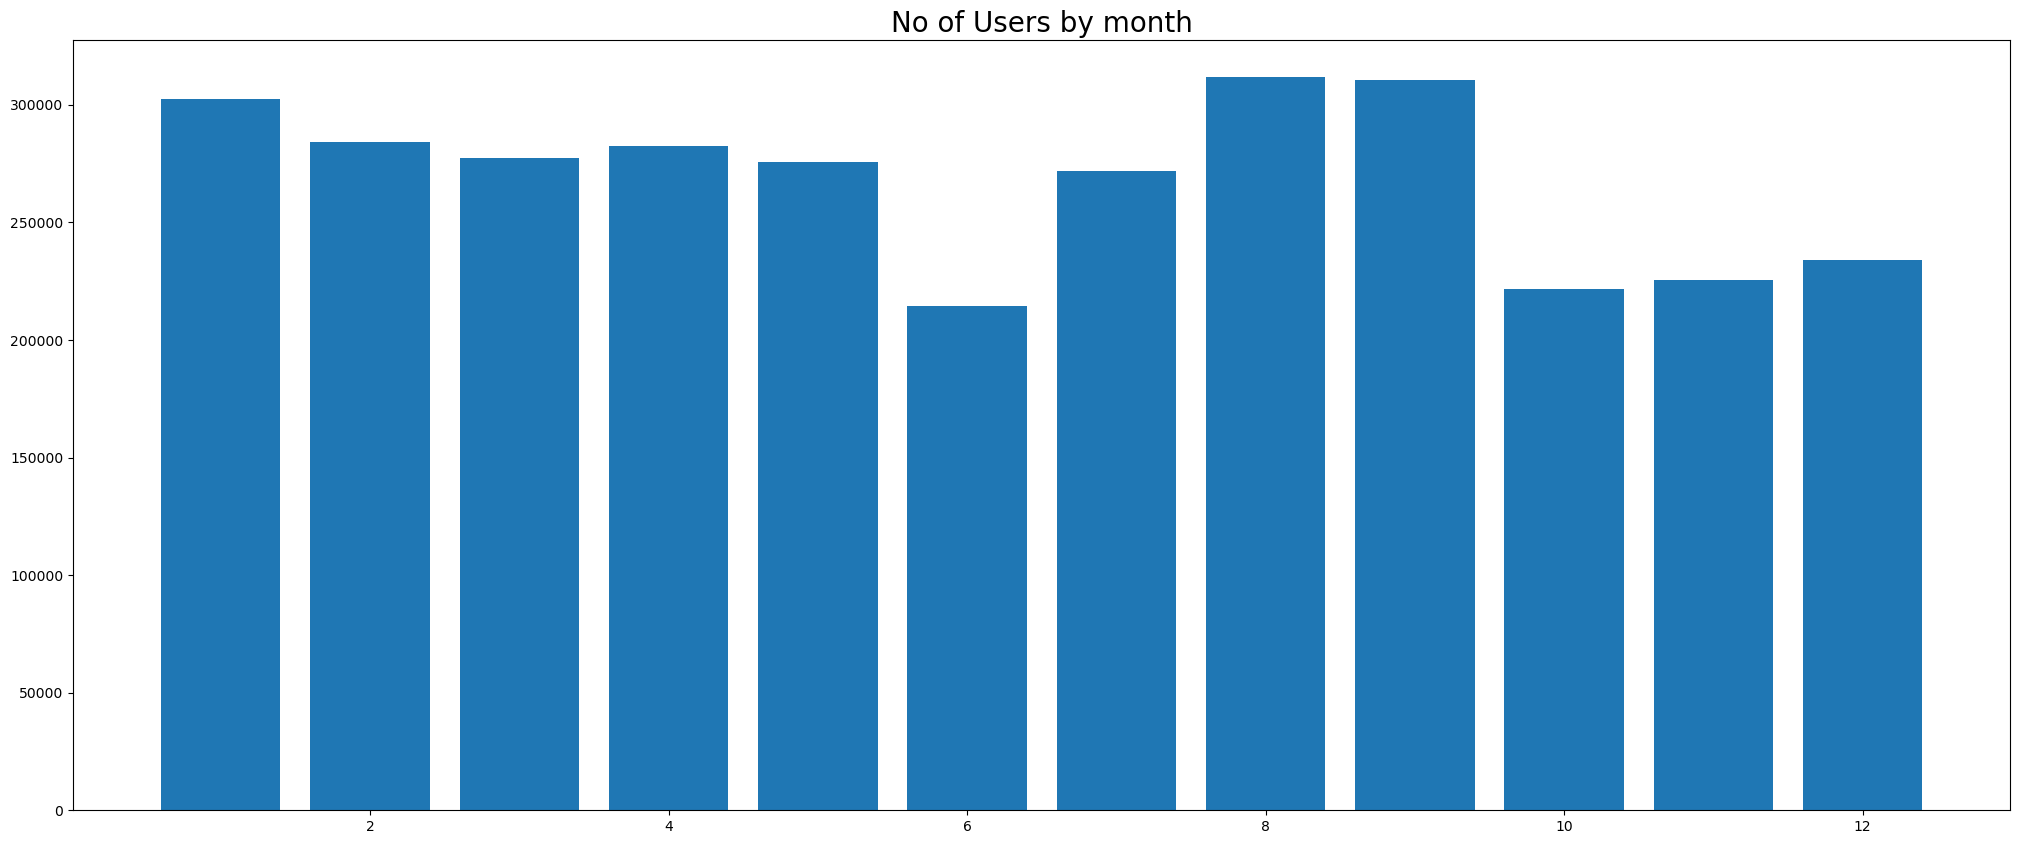

In [104]:
plt.figure(figsize = (25, 10))
plt.bar(data_hour['hour'], data_hour['user_id'])
plt.title("No of Users by hour of day",fontsize=20)

plt.figure(figsize = (25, 10))
plt.bar(data_weekday['weekday'], data_weekday['user_id'])
plt.title("No of Users by day of week",fontsize=20)

plt.figure(figsize = (25, 10))
plt.bar(data_month['month'], data_month['user_id'])
plt.title("No of Users by month",fontsize=20)

In [105]:
data_tag_weekday = data[['weekday', 'bear_bull_tag','user_id']].groupby(['weekday','bear_bull_tag']).count()
data_tag_weekday.reset_index(drop=False, inplace=True)

data_tag_hour = data[['hour', 'bear_bull_tag','user_id']].groupby(['hour','bear_bull_tag']).count()
data_tag_hour.reset_index(drop=False, inplace=True)

data_tag_month = data[['month', 'bear_bull_tag','user_id']].groupby(['month','bear_bull_tag']).count()
data_tag_month.reset_index(drop=False, inplace=True)

In [106]:
### Histogram for bear/bull/notag (By hour of day, By Day of week, By Month of year)

<AxesSubplot:title={'center':'Tag by month'}, xlabel='month'>

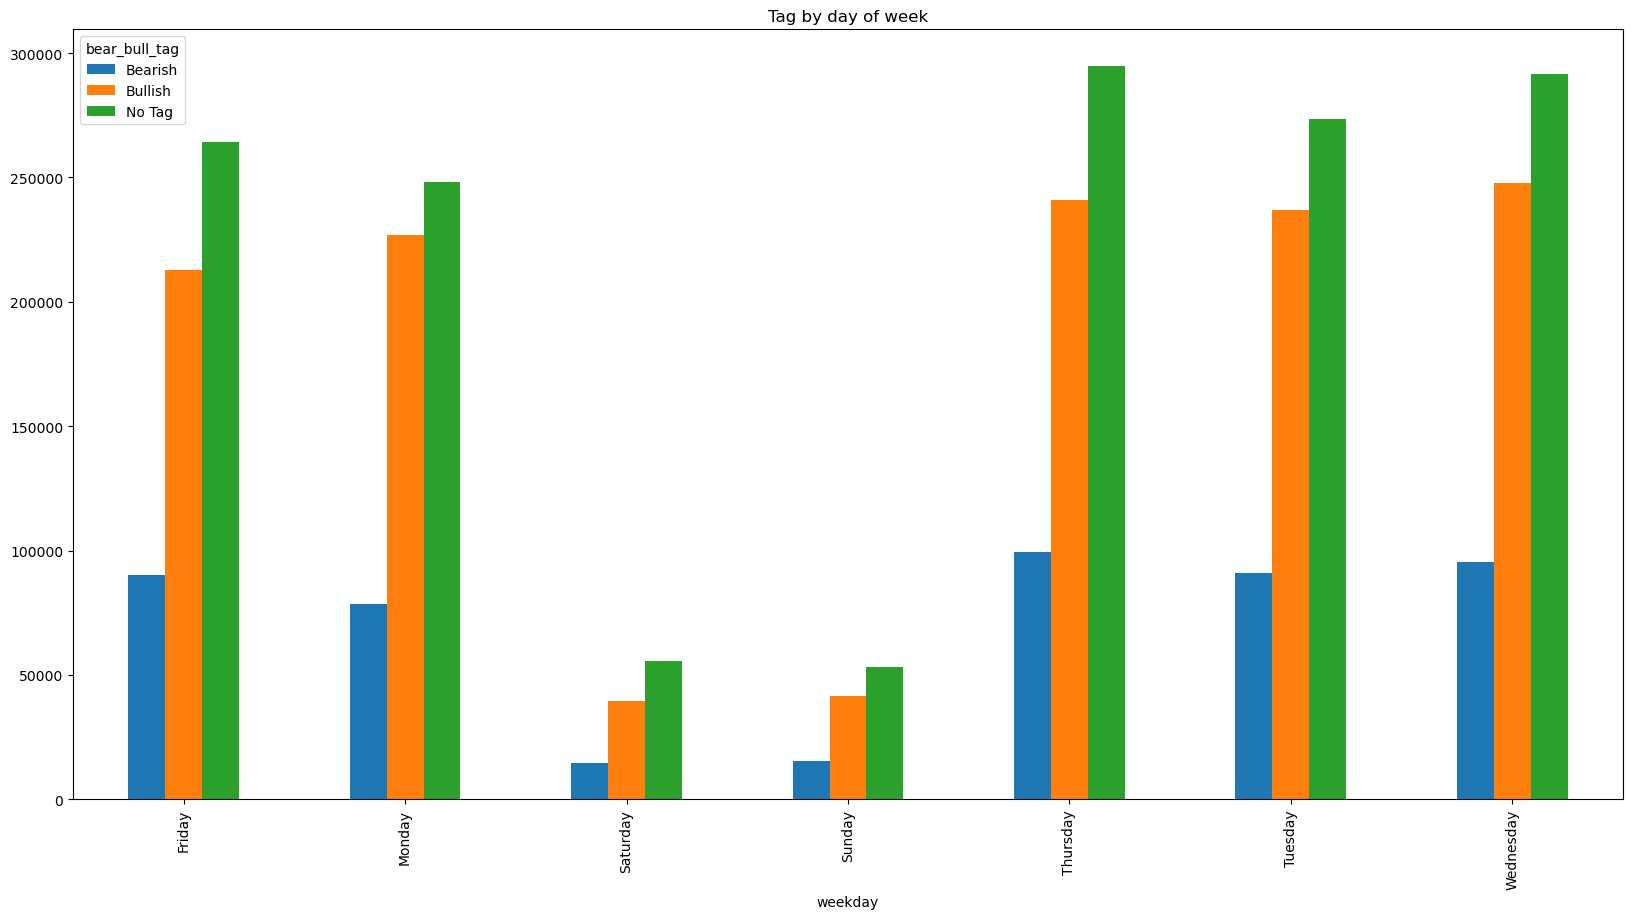

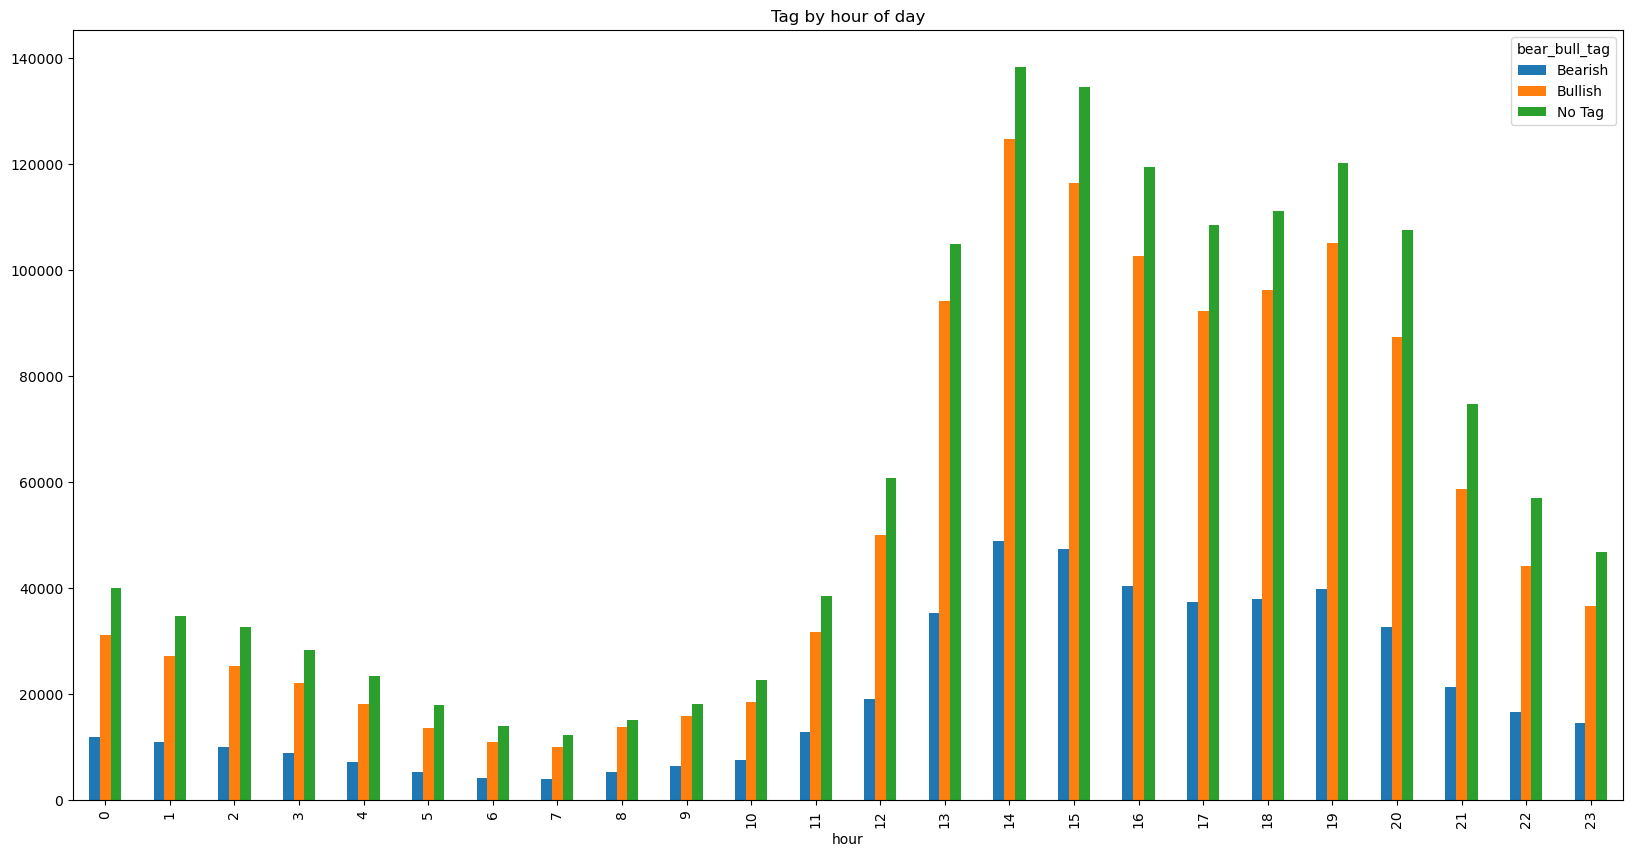

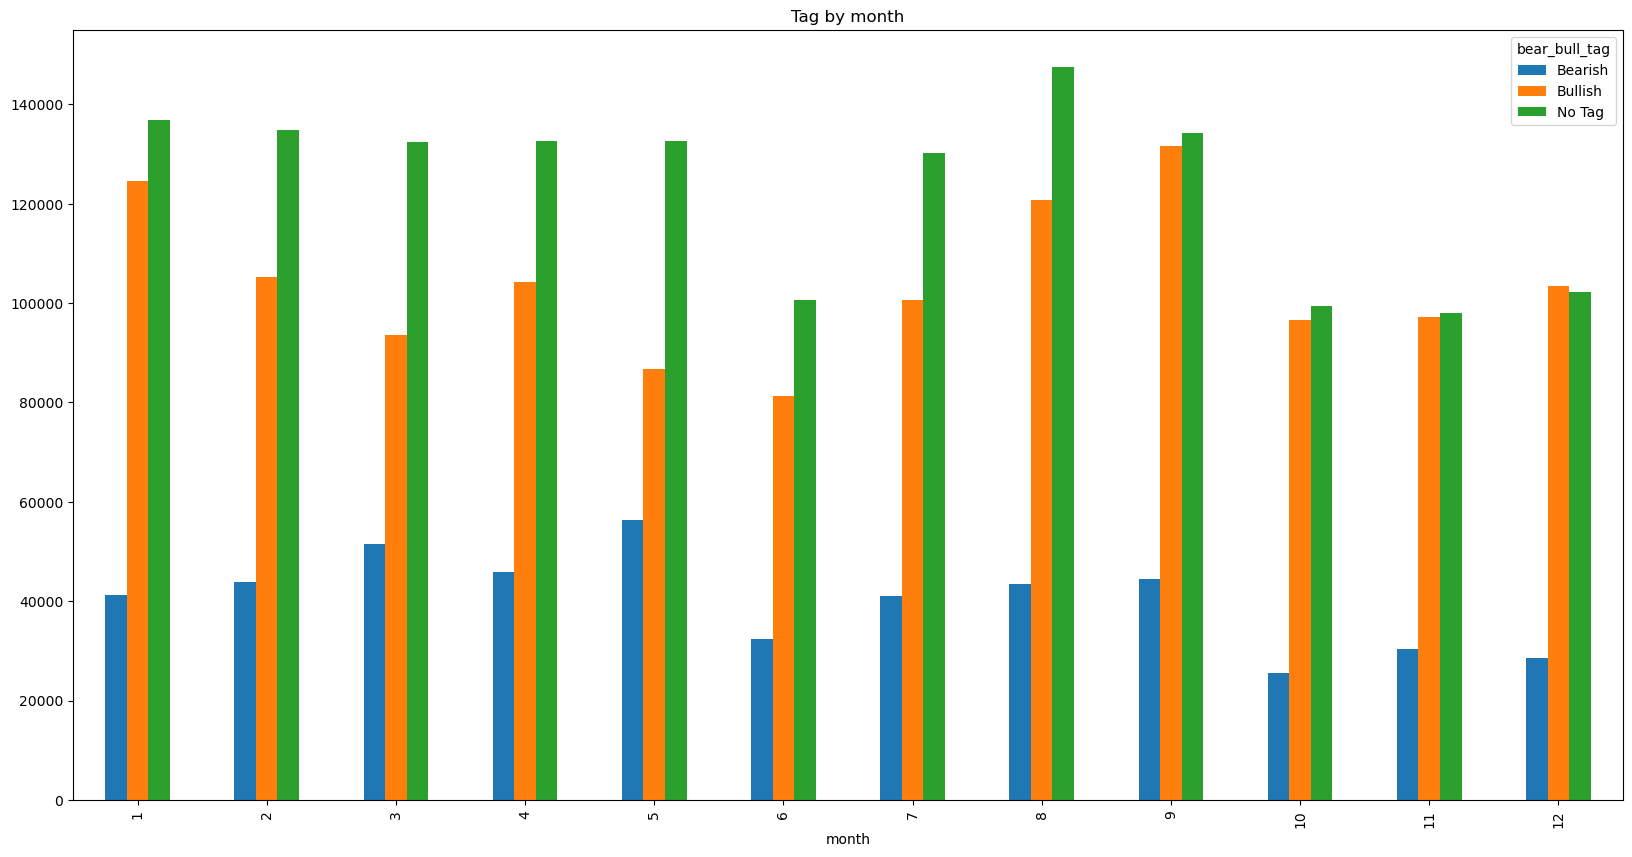

In [107]:

data_tag_weekday.pivot("weekday","bear_bull_tag","user_id").plot(kind='bar',figsize=(20, 10), title = 'Tag by day of week')

data_tag_hour.pivot("hour","bear_bull_tag","user_id").plot(kind='bar',figsize=(20, 10),title = 'Tag by hour of day')

data_tag_month.pivot("month","bear_bull_tag","user_id").plot(kind='bar',figsize=(20, 10),title = 'Tag by month')

## Checking most popular words

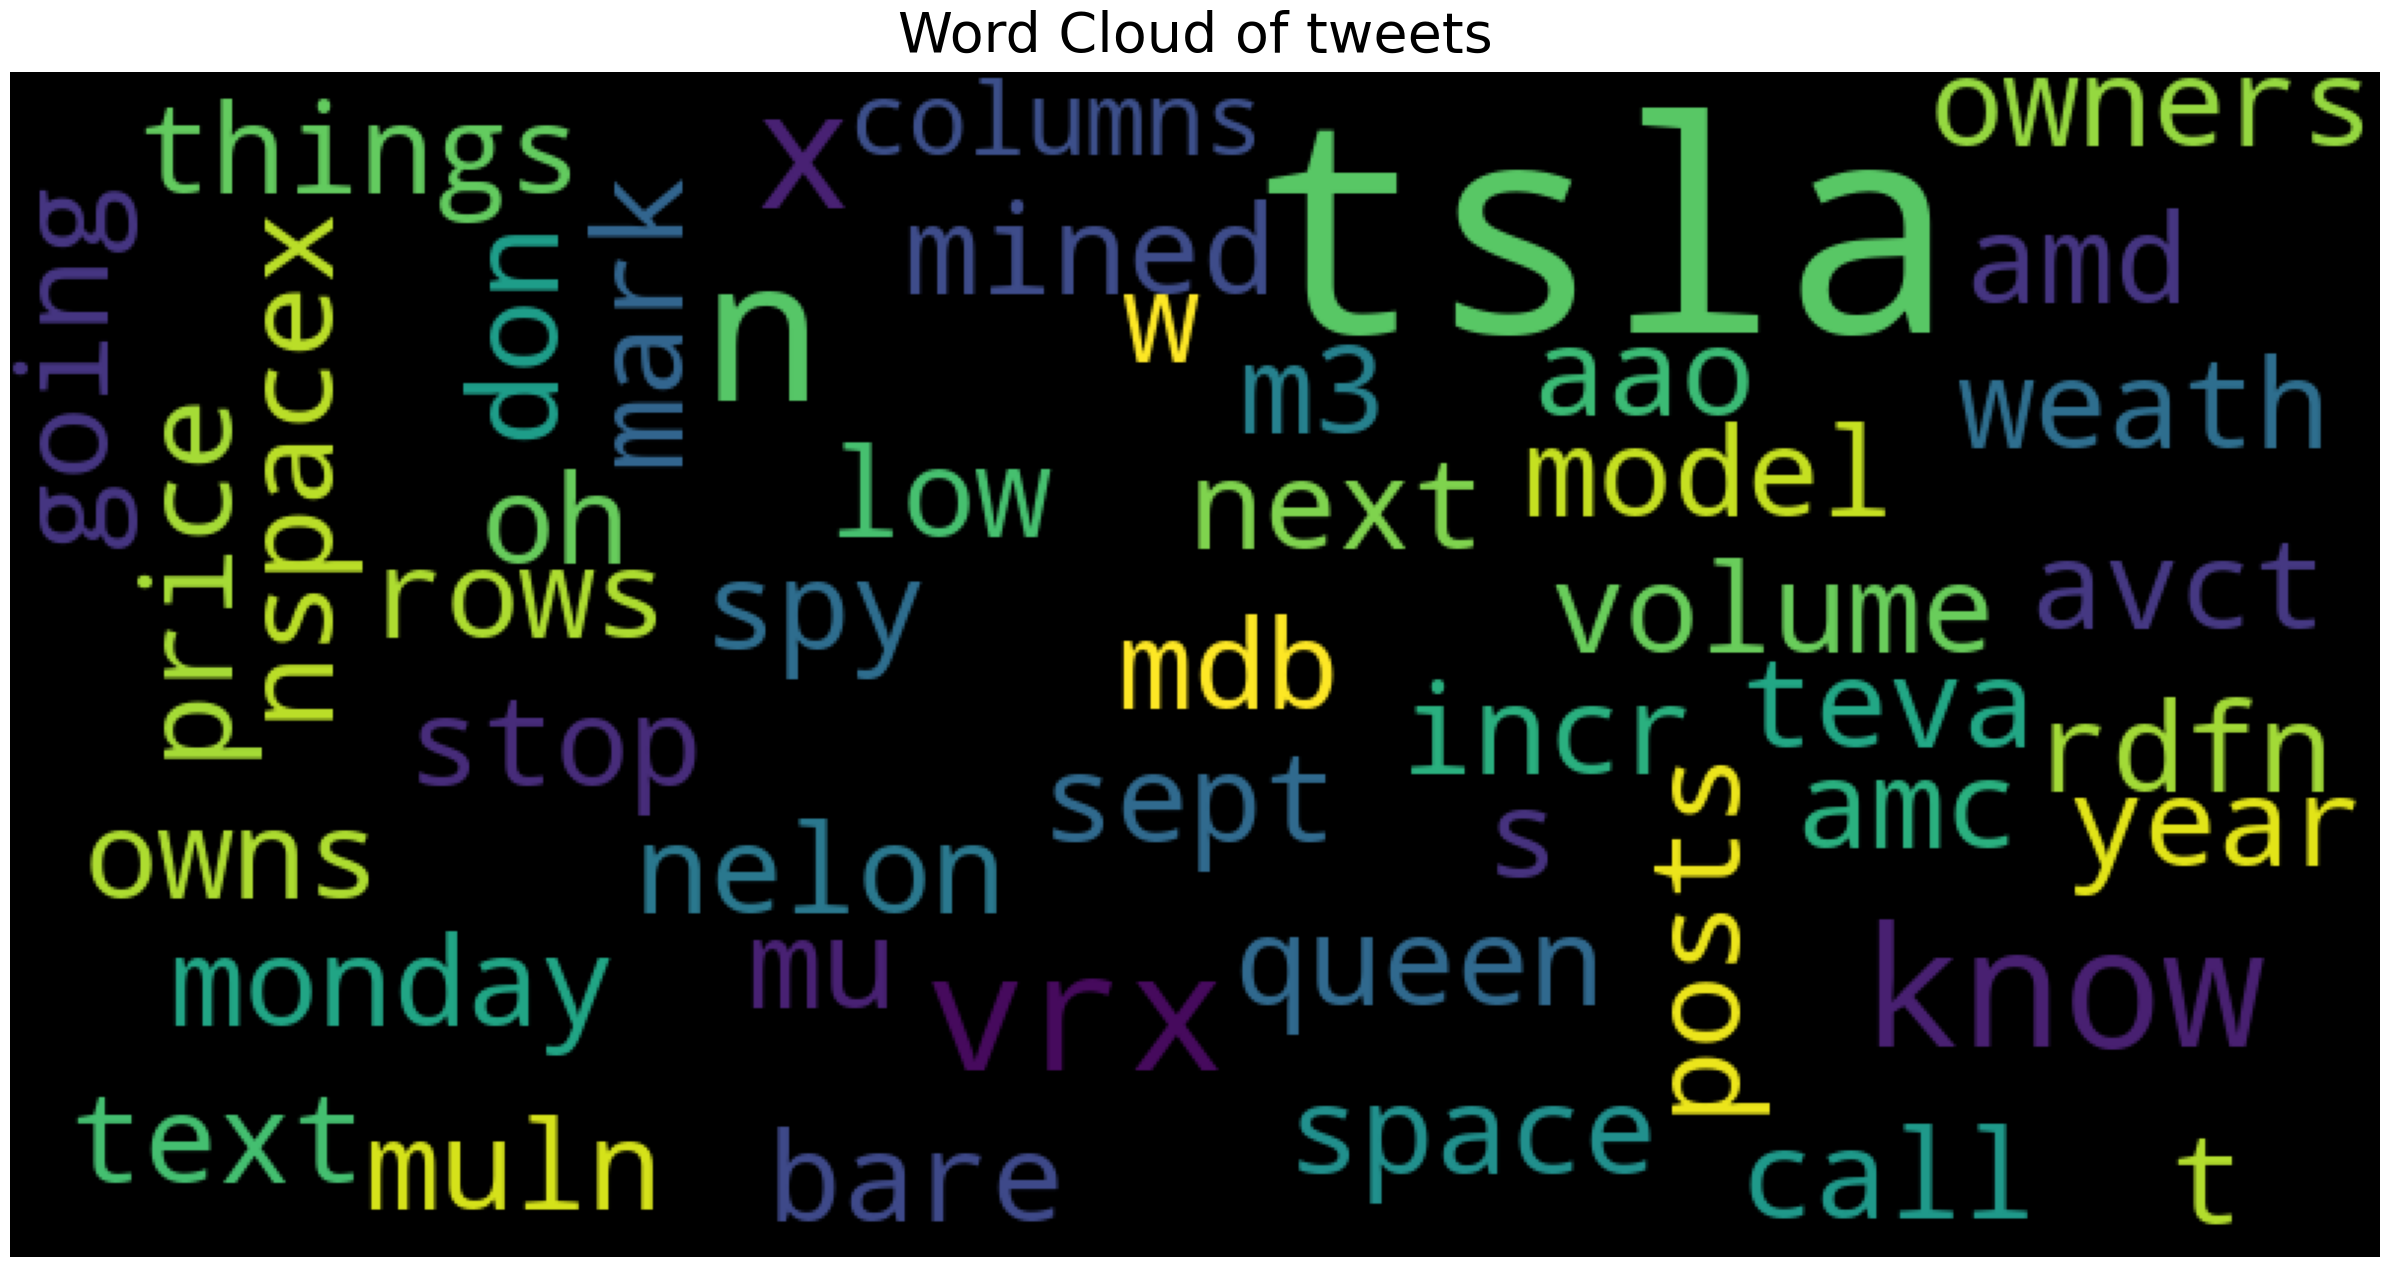

In [108]:
from wordcloud import WordCloud, STOPWORDS

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(data[['text']], title="Word Cloud of tweets")



In [109]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace


freq_dict = defaultdict(int)
for sent in data["text"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')


fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"
                                          ])
fig.append_trace(trace0, 1, 1)

fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
fig.show()

## Stats plot for word Buy

Text(0.5, 1.0, 'Wordcount by month')

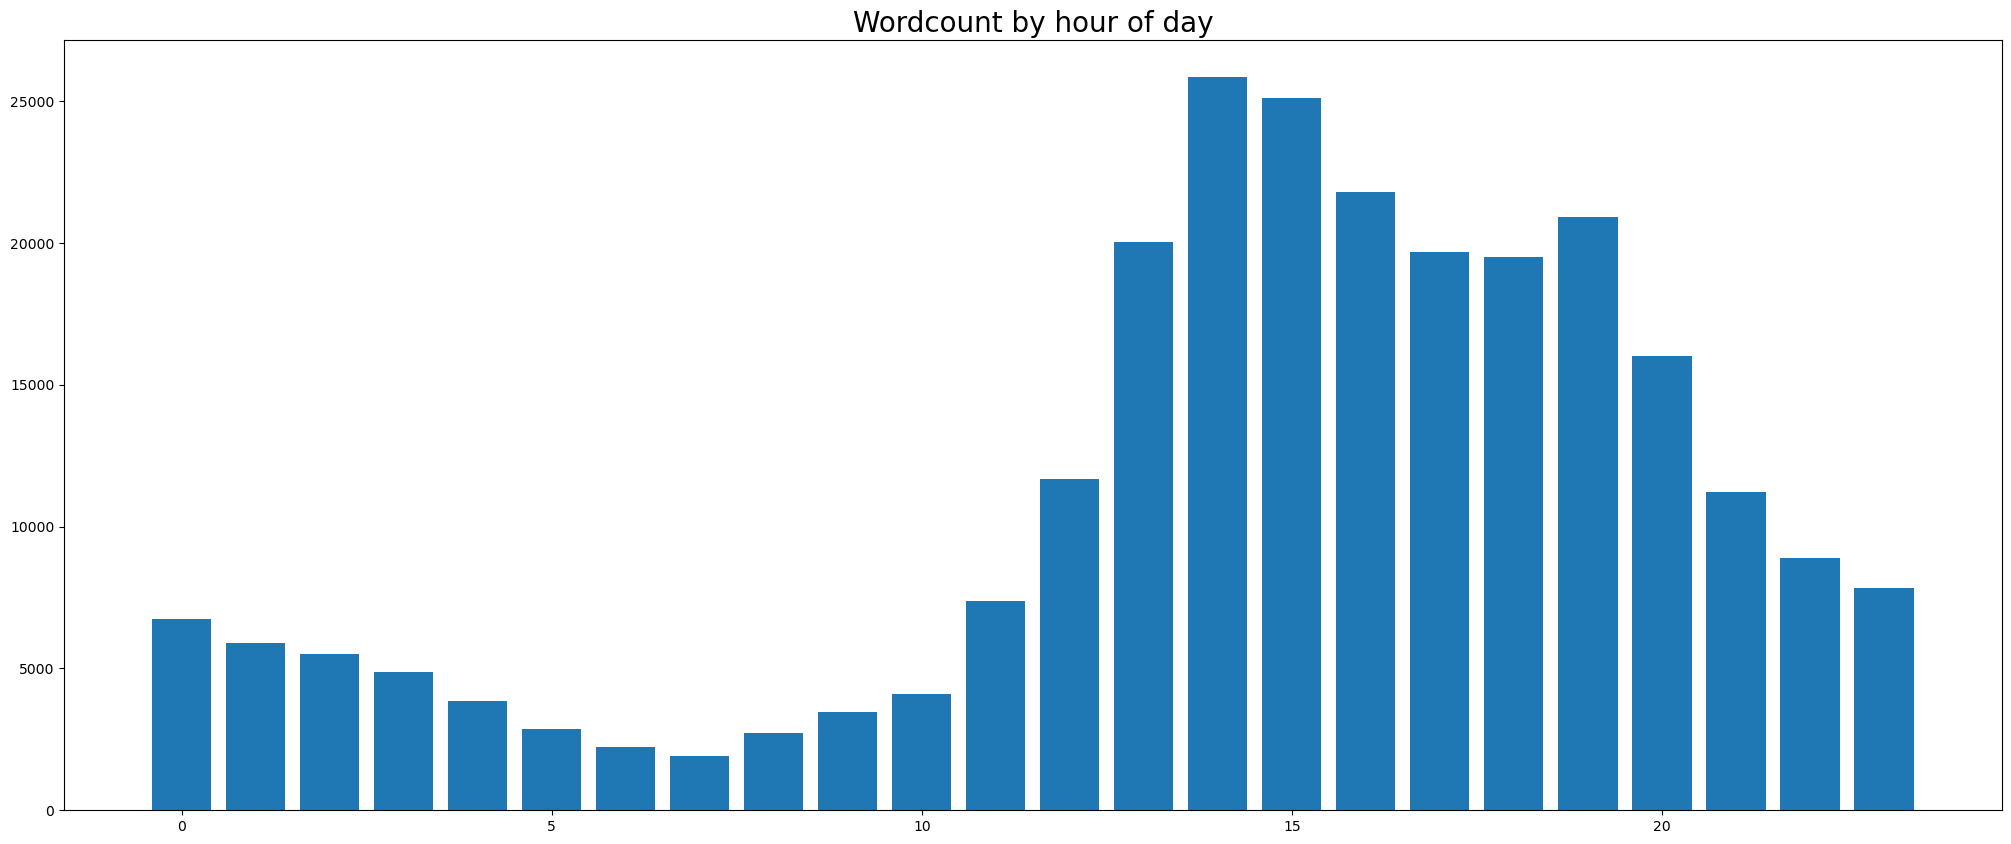

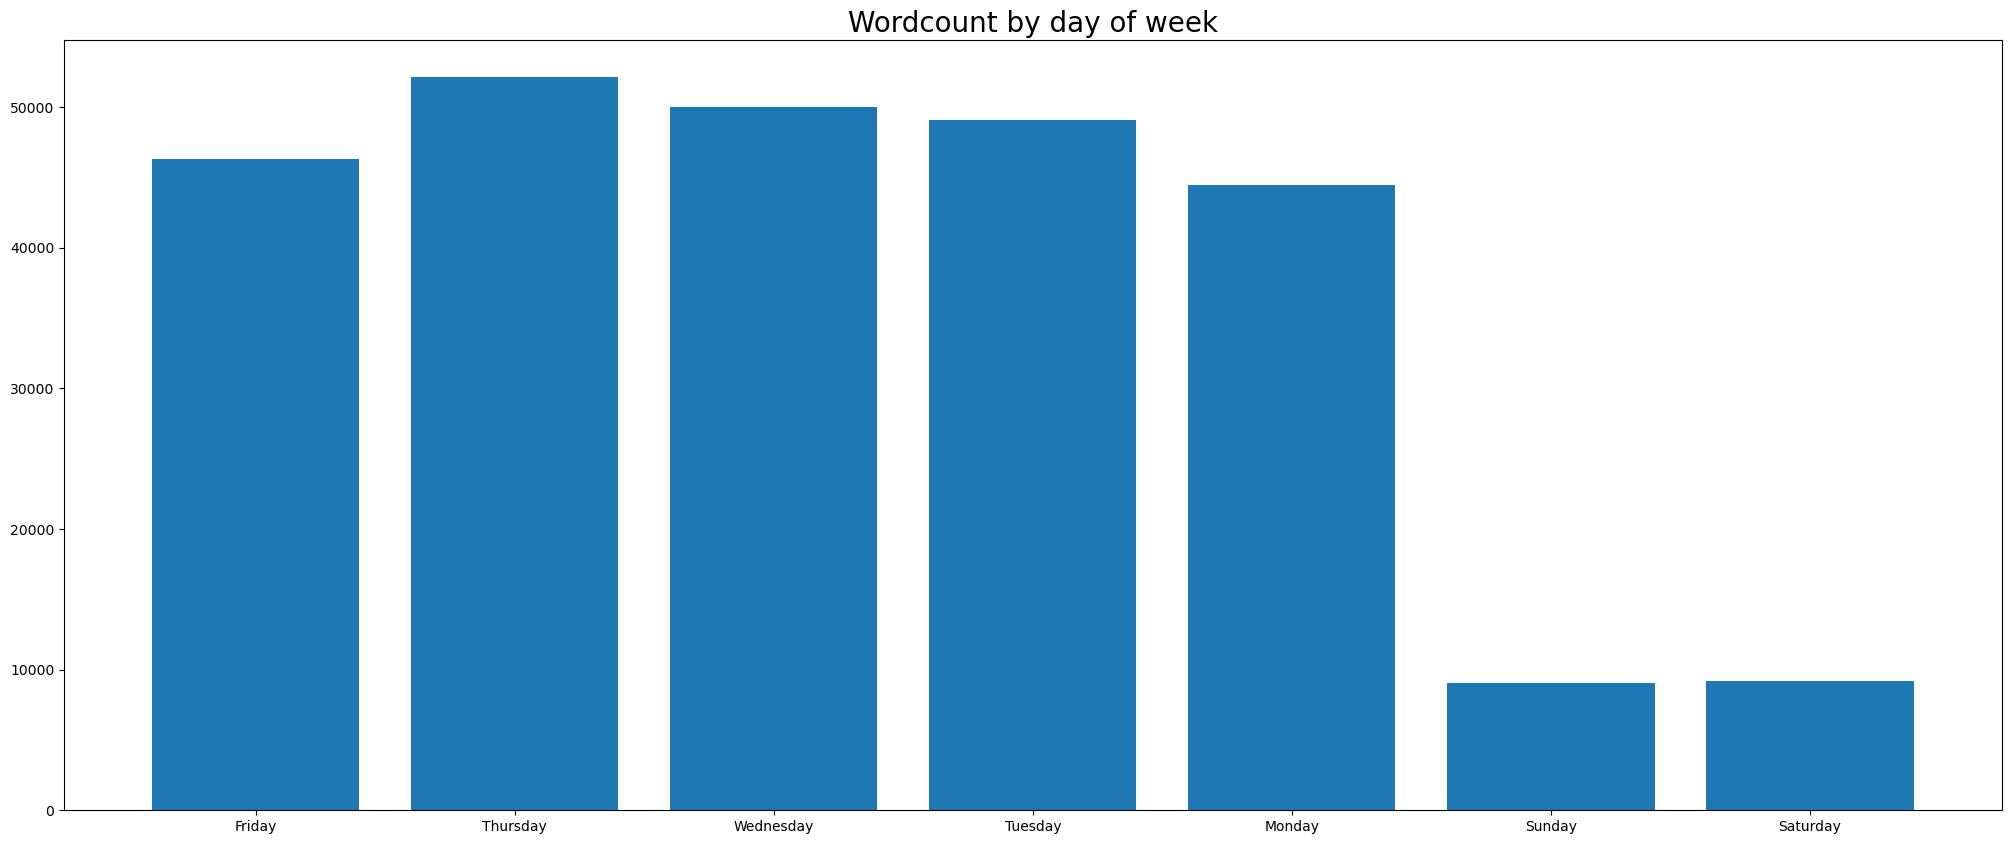

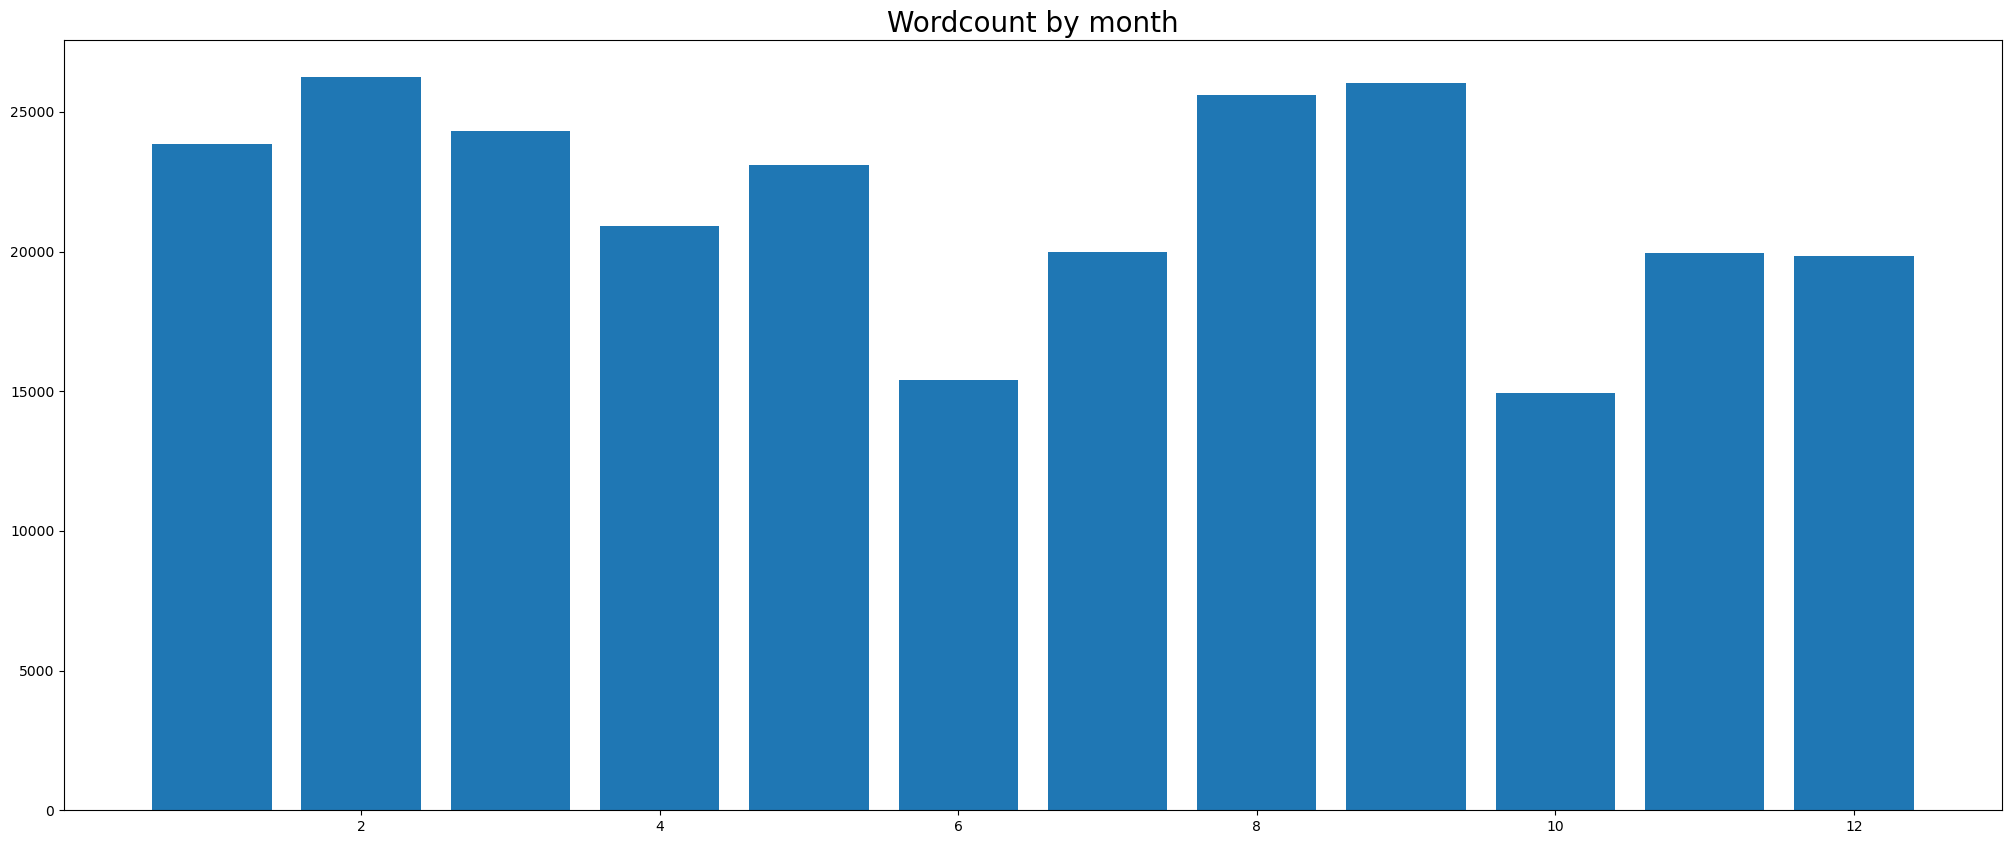

In [110]:
data_popular_hour = data[['text','hour']].set_index(['hour'])
data_popular_hour= data_popular_hour.apply(lambda x: x.str.count("buy")).sum(level = 0)
data_popular_hour.reset_index(drop=False, inplace=True)

data_popular_weekday = data[['text','weekday']].set_index(['weekday'])
data_popular_weekday= data_popular_weekday.apply(lambda x: x.str.count("buy")).sum(level = 0)
data_popular_weekday.reset_index(drop=False, inplace=True)

data_popular_month = data[['text','month']].set_index(['month'])
data_popular_month= data_popular_month.apply(lambda x: x.str.count("buy")).sum(level = 0)
data_popular_month.reset_index(drop=False, inplace=True)

plt.figure(figsize = (25, 10))
plt.bar(data_popular_hour['hour'], data_popular_hour['text']);
plt.title("Wordcount by hour of day",fontsize=20)

plt.figure(figsize = (25, 10))
plt.bar(data_popular_weekday['weekday'], data_popular_weekday['text']);
plt.title("Wordcount by day of week",fontsize=20)

plt.figure(figsize = (25, 10))
plt.bar(data_popular_month['month'], data_popular_month['text']);
plt.title("Wordcount by month",fontsize=20)

## Stats for word short

Text(0.5, 1.0, 'Wordcount by month')

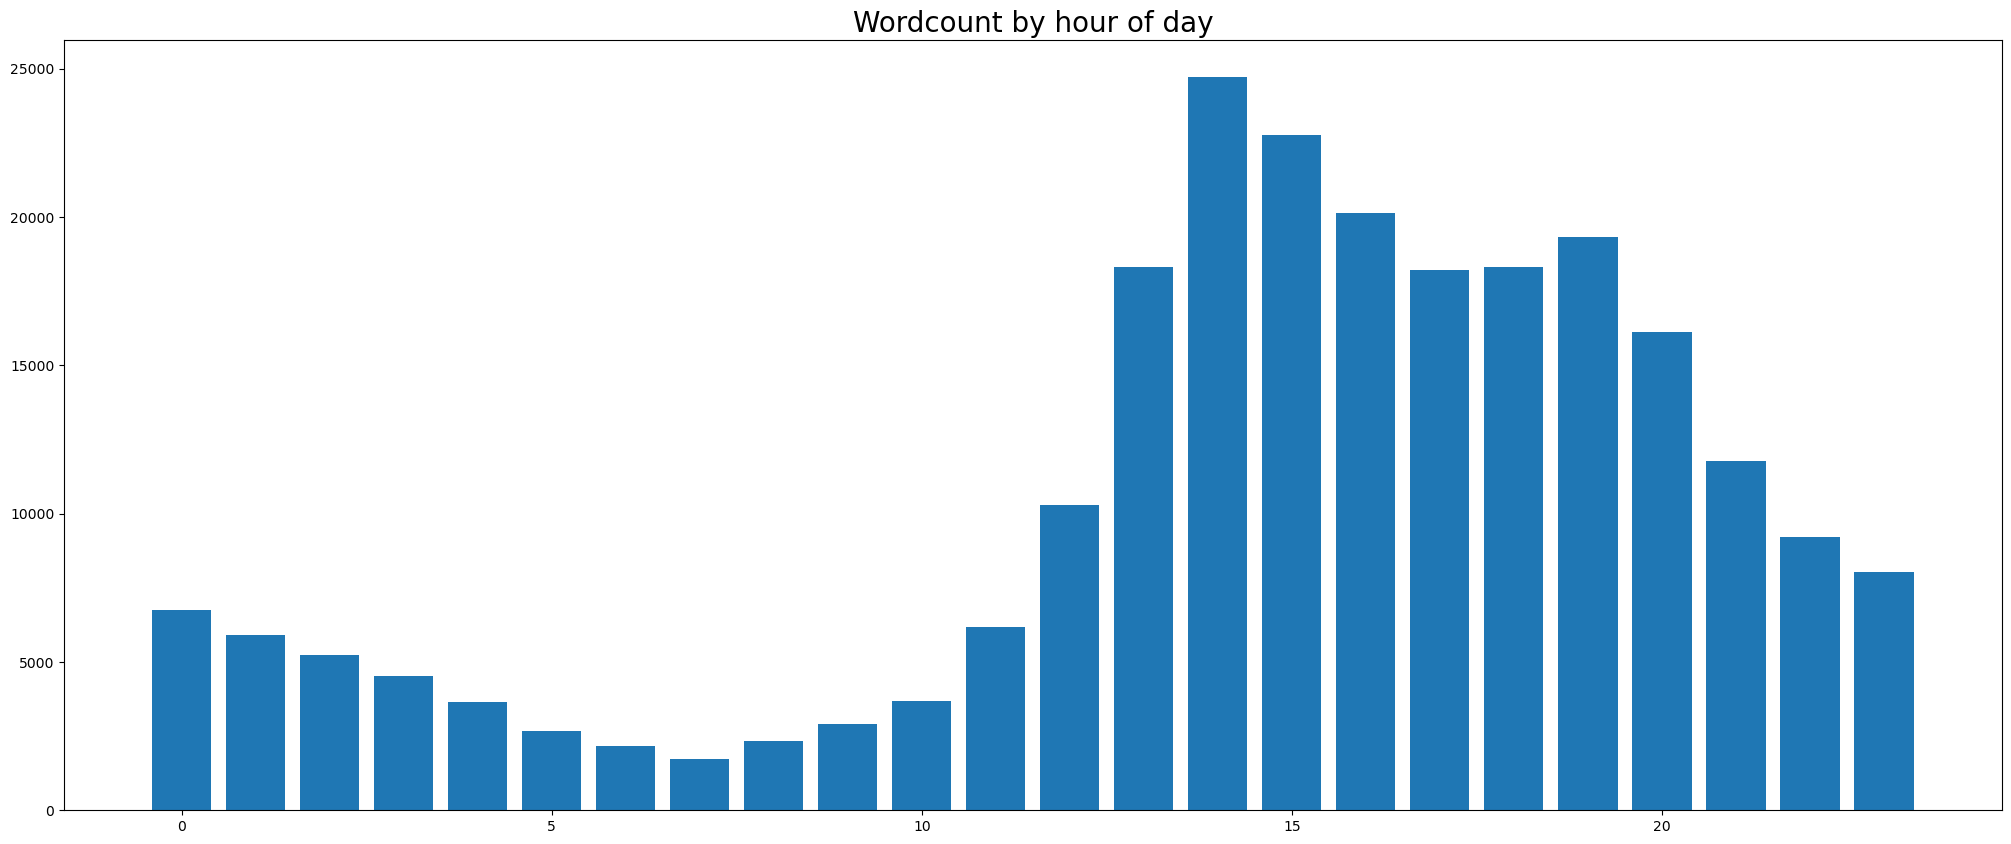

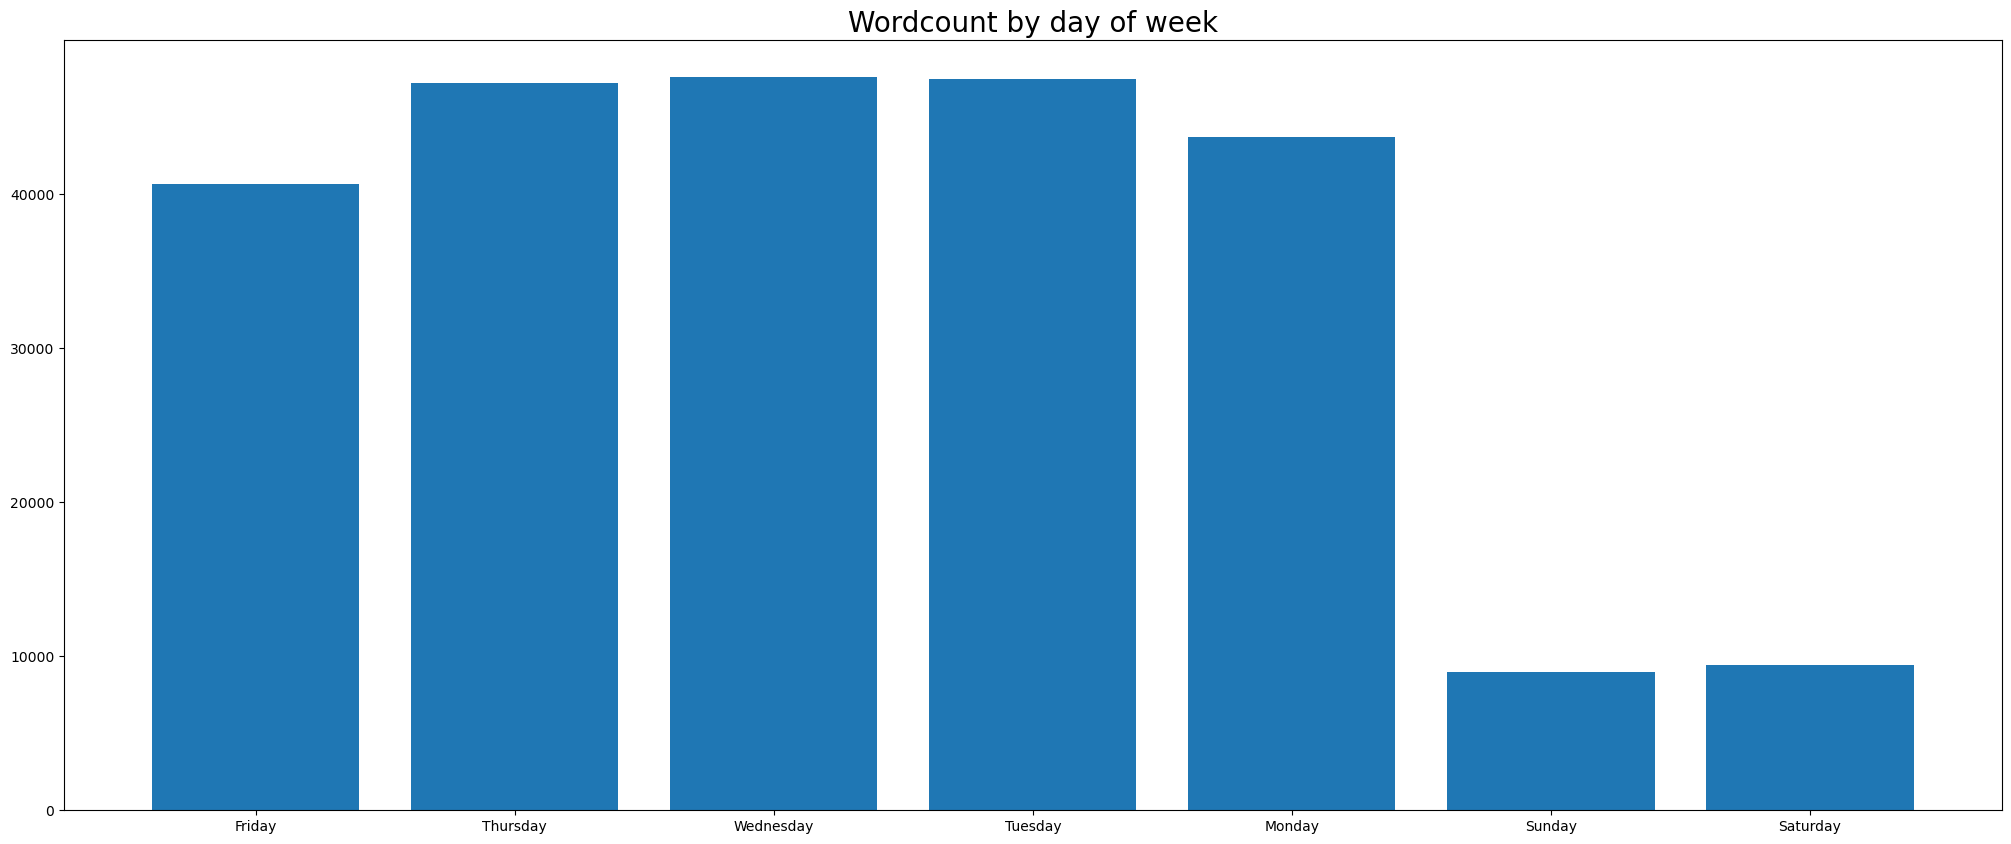

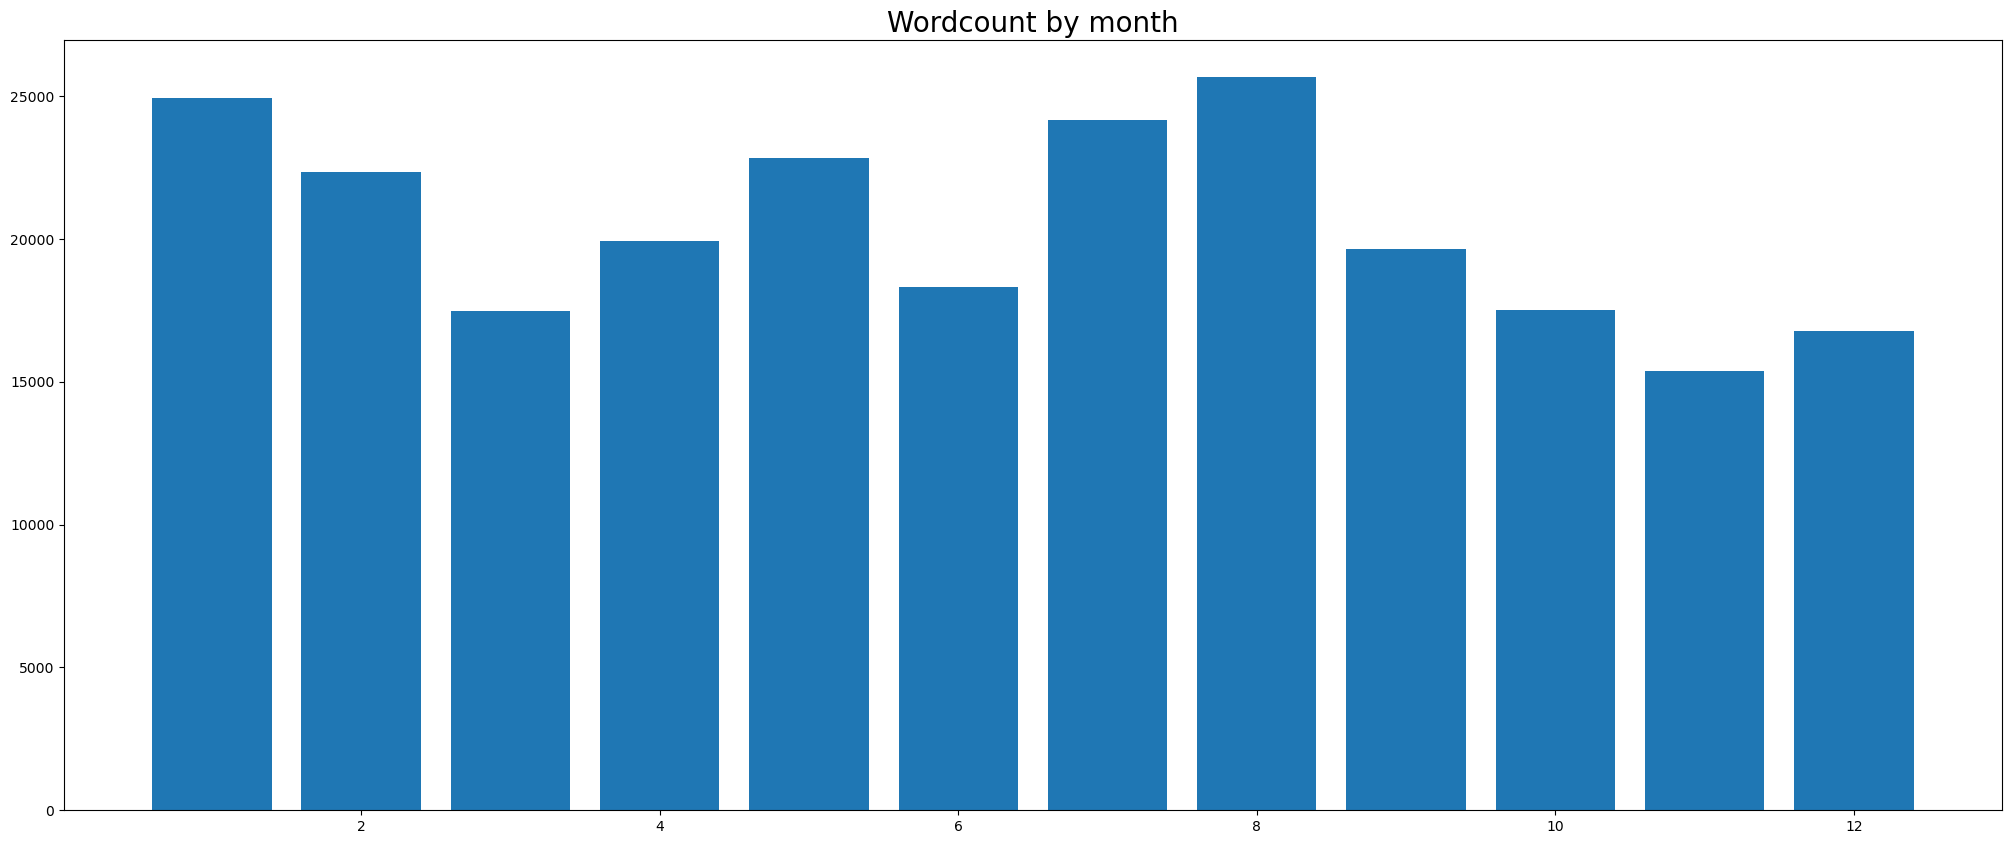

In [111]:
data_popular_hour = data[['text','hour']].set_index(['hour'])
data_popular_hour= data_popular_hour.apply(lambda x: x.str.count("short")).sum(level = 0)
data_popular_hour.reset_index(drop=False, inplace=True)

data_popular_weekday = data[['text','weekday']].set_index(['weekday'])
data_popular_weekday= data_popular_weekday.apply(lambda x: x.str.count("short")).sum(level = 0)
data_popular_weekday.reset_index(drop=False, inplace=True)

data_popular_month = data[['text','month']].set_index(['month'])
data_popular_month= data_popular_month.apply(lambda x: x.str.count("short")).sum(level = 0)
data_popular_month.reset_index(drop=False, inplace=True)

plt.figure(figsize = (25, 10))
plt.bar(data_popular_hour['hour'], data_popular_hour['text']);
plt.title("Wordcount by hour of day",fontsize=20)

plt.figure(figsize = (25, 10))
plt.bar(data_popular_weekday['weekday'], data_popular_weekday['text']);
plt.title("Wordcount by day of week",fontsize=20)

plt.figure(figsize = (25, 10))
plt.bar(data_popular_month['month'], data_popular_month['text']);
plt.title("Wordcount by month",fontsize=20)

In [118]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis.sklearn
from pylab import bone, pcolor, colorbar, plot, show, rcParams, savefig


text_1 = data["text"]

#count vectorization
vectorizer_1= CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')

text1_vectorized = vectorizer_1.fit_transform(text_1)

/Users/chaitanyakota/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning:

the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses



In [119]:
lda1 = LatentDirichletAllocation(n_components=5, max_iter=5, learning_method='online',verbose=True)


lda_1 = lda1.fit_transform(text1_vectorized)


iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5


In [120]:
def selected_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]]) 

In [121]:
print("LDA Model of Bioarvix data Abstracts:")
selected_topics(lda1, vectorizer_1)

LDA Model of Bioarvix data Abstracts:
Topic 0:
[('bears', 124099.67394489505), ('shorts', 121870.72976069697), ('today', 99301.11056533255), ('market', 92136.53271374742), ('bulls', 87589.31247555799), ('short', 84738.17725293965), ('spy', 84513.32046181096), ('aapl', 82048.95774846), ('good', 75698.72158438867), ('going', 73513.01042799786)]
Topic 1:
[('https', 254273.64522555843), ('tesla', 246452.80968188483), ('com', 220921.2661803549), ('www', 130564.19847488597), ('news', 124114.7430256736), ('model', 76812.57378658059), ('car', 59117.19864307853), ('cars', 54581.20575203771), ('nio', 49065.79970678989), ('amp', 48617.62186335027)]
Topic 2:
[('stock', 162131.9764936765), ('quot', 139617.8002551581), ('buy', 134967.88791808992), ('amp', 115388.67163948633), ('price', 60945.905489287616), ('utm', 60722.64591192417), ('did', 36835.02617677737), ('open', 35754.22996617922), ('earnings', 35312.24610761107), ('selling', 34170.00012729507)]
Topic 3:
[('elon', 157519.11687583217), ('like

In [123]:
pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda1, text1_vectorized, vectorizer_1, mds='tsne')
dash

/Users/chaitanyakota/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/chaitanyakota/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/chaitanyakota/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/chaitanyakota/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/chaitanyakota/opt/anaconda3/lib/pytho

/Users/chaitanyakota/opt/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/chaitanyakota/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/chaitanyakota/opt/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/chaitanyakota/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/chaitanyakota/opt/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarnin

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3      150.222153  -72.269554       1        1  26.820910
1       51.163364 -159.968018       2        1  22.583477
0      -73.144554   21.523815       3        1  21.531448
2      -66.410133 -110.606438       4        1  15.338305
4       54.417324   12.443444       5        1  13.725861, topic_info=          Term           Freq          Total Category  logprob  loglift
28734    https  295583.000000  295583.000000  Default  30.0000  30.0000
55386    stock  184986.000000  184986.000000  Default  29.0000  29.0000
57836    tesla  366154.000000  366154.000000  Default  28.0000  28.0000
12790      com  261496.000000  261496.000000  Default  27.0000  27.0000
47019     quot  159298.000000  159298.000000  Default  26.0000  26.0000
...        ...            ...            ...      ...      ...      ...
65263     week   42489.680618  103012.910241   Topic5  -4.4093   1.1003
11374    chart   21658.913175   29836.270231   Topic5  -5.0831   1.6656
15526      day   38813.164375  119335.533965   Topic5  -4.4998   0.8627
60982  trading   23889.238863   46220.652800   Topic5  -4.9851   1.3259
23867   friday   19409.698431   30254.382768   Topic5  -5.1928   1.5420

[235 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
1998       3  0.999994       aapl
2989       1  0.999956        ago
3760       3  0.999975        amd
3851       2  0.285874        amp
3851       4  0.714123        amp
...      ...       ...        ...
66758      4  0.110211        www
67383      5  0.999936        yes
67411      1  0.999970  yesterday
67600      2  0.999978      youtu
67601      2  0.999974    youtube

[234 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 3, 5])

In [127]:
pyLDAvis.save_html(dash, '/Users/chaitanyakota/Desktop/Stockwits_RA/TSLAlda.html')